In [37]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *

In [38]:
CatBino=ReadCatalogs("../A-Catalogs/Binospec-Candels.cat")


The midpoint of the biggest bin is: -16.74911431927113


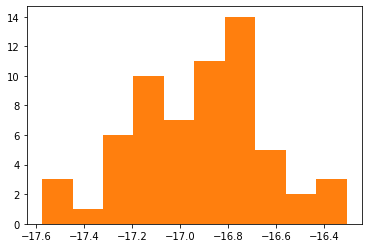

In [53]:
b = 10
plt.hist(CatBino["LyaFlux"], bins=b)
counts, bins, patches = plt.hist(CatBino["LyaFlux"], bins=b)
biggest_bin_index = np.argmax(counts)
biggest_bin_midpoint = (bins[biggest_bin_index] + bins[biggest_bin_index + 1]) / 2
print(f"The midpoint of the biggest bin is: {biggest_bin_midpoint}")
plt.show()

In [51]:
bins

array([-17.57362527, -17.31992959, -17.06623391, -16.81253824,
       -16.55884256, -16.30514689])

In [2]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

In [19]:
Dic={"z6_GNW_11543":5.611,
     "z6_GND_36553":5.606,
    "z5_GND_7766":5.591,
    "z5_GND_13996":6.315,
    "z5_GND_23860":5.092,
    "z5_GND_10047":5.194,
    "z5_GND_28693":5.344,
    "Hu10_z6_12":5.189,
    "Hu10_z6_9":5.241,
    "Stark11_43_3982":5.703,
    "Stark11_42_13066":5.606
     }
     

In [31]:
CatBino["Type"]

<Column name='Type' dtype='str9' length=127>
NonDetect
NonDetect
NonDetect
NonDetect
NonDetect
NonDetect
      LAE
      LAE
NonDetect
NonDetect
NonDetect
      LAE
      ...
NonDetect
NonDetect
      LAE
NonDetect
NonDetect
NonDetect
      LAE
      LAE
      LAE
      LAE
      LAE
      LAE

In [32]:
CatBino=ReadCatalogs("../A-Catalogs/Binospec-Candels.cat")
CatBino=CatBino[CatBino["EWLya"]>0]
maskInFresco=CatBino["inFresco"]=="inFresco"
CatBino=CatBino[maskInFresco]
mask_zsys=CatBino["zsys"]>0
Cat_zsys=CatBino[mask_zsys]
Cat_nozsys=CatBino[~mask_zsys]


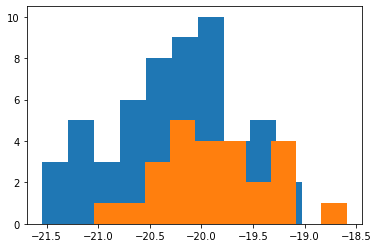

-20.176336648033086
-19.9808578770063
KS Statistic: 0.2581818181818182
P-value: 0.16815892123594112


In [36]:
from scipy.stats import ks_2samp

plt.hist(Cat_zsys["Muv"])
plt.hist(Cat_nozsys["Muv"])
plt.show()

print(np.median(Cat_zsys["Muv"]))
print(np.median(Cat_nozsys["Muv"]))
# Perform KS test
ks_stat, p_value = ks_2samp(Cat_zsys["Muv"], Cat_nozsys["Muv"])

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

In [34]:
len(Cat_zsys)/len(CatBino)

0.6875

In [26]:
56/82

0.6829268292682927

In [3]:
HaCat=ascii.read("../A-Catalogs/HaLines.cat")


In [28]:
CatBino=ReadCatalogs("../A-Catalogs/Binospec-Candels.cat")
ID_mask = [True if CatBino["id_charlotte"][i] in list(HaCat["ID"]) else False for i in range(len(CatBino["id_charlotte"]))]
CatBino=CatBino[ID_mask]
Voff_mask=CatBino["voff"]>0
CatBino=CatBino[Voff_mask]

Fresco=ReadCatalogs("../A-Catalogs/Fresco_latest.cat")

idx,d2d=xmatch.xmatch(CatBino["ra_candels"],CatBino["dec_candels"],Fresco["ra"],Fresco["dec"])
mask=[]
for i,d in zip(idx,d2d):
    print(i,d)
    if d.value<(0.5/3600.):
        mask.append(True)
    else:
        mask.append(False)


CatBino=CatBino[mask]
idx=idx[mask]
d2d=d2d[mask]
Fresco=[Fresco[i] for i in idx]


ids=[]
Fresco2,Bino2 = [],[]

# iterate through each element in the original array
for i,element in enumerate(Fresco):
    # add the element to the new list if it is not already there
    if element["id"] not in ids:
        Fresco2.append(element)
        Bino2.append(CatBino[i])
    else:
        print(CatBino[i]["id_charlotte"])
    ids.append(element["id"])

Fresco=Fresco2[:]
CatBino=Bino2[:]

2585 0d00m00.09455596s
3219 0d00m00.07149453s
2247 0d00m00.01642394s
2969 0d00m00.10270614s
849 0d00m00.11388678s
3858 0d00m00.04288048s
1563 0d00m00.15622892s
7079 0d00m00.01940718s
4002 0d00m00.0150316s
1016 0d00m00.10032998s
2776 0d00m00.05310549s
6867 0d00m00.05818534s
3707 0d00m00.06779485s
6824 0d00m00.12222723s


In [29]:
len(CatBino)

14

In [35]:
import os
FrescMeta={}
inFresco=[]
for i in range(0,len(CatBino)):
    inFresco.append(CatBino[i]["id_charlotte"])
    print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['z'],6564.614*(1+CatBino[i]['z']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
    if len(str(Fresco[i]["id"]))==5:
        FrescMeta[str(CatBino[i]["id_charlotte"])]=[str(Fresco[i]["id"]),CatBino[i]['photoz']]
        os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_'+str(Fresco[i]["id"])+'.1D.fits')
        os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_'+str(Fresco[i]["id"])+'.stack.fits')
    if len(str(Fresco[i]["id"]))==4:
        FrescMeta[str(CatBino[i]["id_charlotte"])]=["0"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
        os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_0'+str(Fresco[i]["id"])+'.1D.fits')
        os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_0'+str(Fresco[i]["id"])+'.stack.fits')
    if len(str(Fresco[i]["id"]))==3:
        FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
        os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_00'+str(Fresco[i]["id"])+'.1D.fits')
        os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_00'+str(Fresco[i]["id"])+'.stack.fits')
    if len(str(Fresco[i]["id"]))==2:
        print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['photoz'],6564.614*(1+CatBino[i]['photoz']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
        FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['photoz']]
        os.system('wget -P ../data/large_files/Fresco/https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_000'+str(Fresco[i]["id"])+'.1D.fits')
        print('https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_000'+str(Fresco[i]["id"])+'.1D.fits')
        os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-only-n-v2/Extractions/fresco-only-n-v2_000'+str(Fresco[i]["id"])+'.stack.fits')


#np.save("../Catalogs/nonLAEinFresco.npy",np.array(inFresco))

0 30244 z6_GNW_14511 5.6155224679571525 43428.35141046607 189.10054126 189.1005376
1 29525 z6_GND_36100 5.602855555666433 43345.19802070564 189.19125113 189.19127434
2 2432 z6_GND_43125 5.658455285989933 43710.18878878352 189.18912876 189.18913737
3 29820 z6_GND_36553 5.610946246224566 43398.310281213235 189.15632716 189.156387
4 3869 z5_GND_7766 5.5912848204122305 43269.24061006561 189.14004222 189.139984
5 4650 z7_GND_8358 6.81350987154856 51292.676291905875 189.15530022 189.15531040000002
6 31564 z5_GND_39445 5.504830466775019 42701.70114981782 189.17858987 189.17864269
7 23493 z5_GND_27819 5.351014740851722 41691.960282001586 189.11034667 189.11033662
8 17353 z5_GND_21153 5.448337558633712 42330.84701413268 189.04961958 189.0496284
9 13902 z5_GND_17752 5.774442915753641 44471.60280695717 189.09185092 189.09179789
10 16141 Stark11_43_3982 5.7079772054167845 44035.2810743599 189.03926307 189.039261
11 21531 Stark11_33_17705 5.802736500892482 44657.339272069796 189.20818776 189.208206

In [36]:
ids=[]
for i,j in zip(Fresco,CatBino):
    if len(str(i["id"])) == 2:
        num = "000" + str(i["id"])
    elif len(str(i["id"])) == 3:
        num = "00" + str(i["id"])
    elif len(str(i["id"])) == 4:
        num = "0" + str(i["id"])
    else:
        num=str(i["id"])
    ids.append(num)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
02432
z6_GND_43125
SNHA 11.2
SNOiii -99.0
zspec 5.657
38208.584494237555 50802.54773372237
43700.635398


<ipython-input-37-0edc804b6884>:71: RuntimeWarning: invalid value encountered in true_divide
  datos=(f[1].data["flux"]/f[1].data["flat"])[mask]


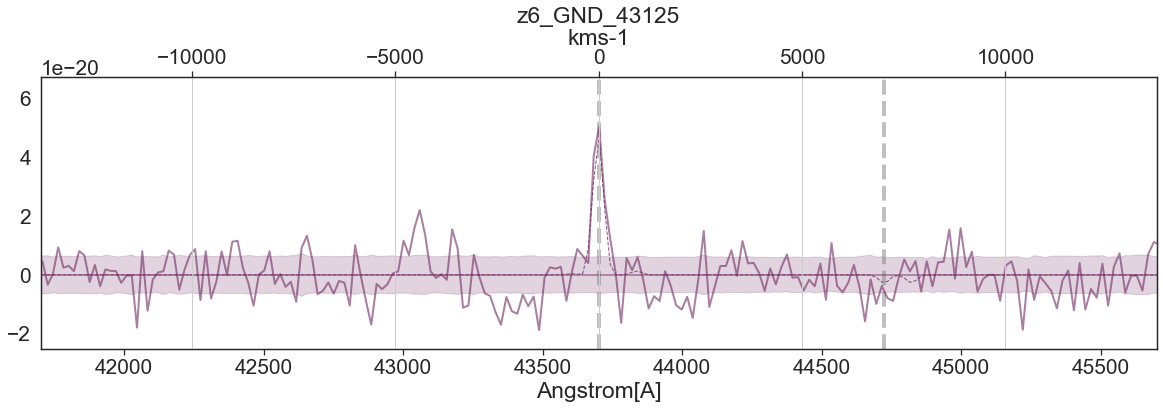

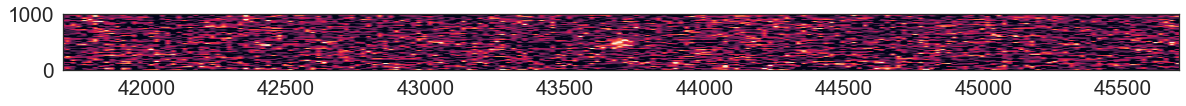

In [37]:
from scipy import interpolate
import matplotlib
import ipympl
%load_ext autoreload
%autoreload 
%matplotlib inline
i=2
print(ids[i])
print(CatBino[i]['id_charlotte'])
print("SNHA",Fresco2[i]["sn_ha"])
print("SNOiii",Fresco2[i]["sn_oiii"])
print("zspec",Fresco2[i]["z_map"])
f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+ids[i]+".1D.fits")
f2D=fits.open("../data/large_files/Fresco/2D/fresco-only-n-v2_"+ids[i]+".stack.fits")
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()

z=Fresco2[i]["z_map"]
Ha=6564.614*(1+z)
Sii=6718.29*(1+z)
Oiii=5008.23*(1+z)

print(min(f[1].data["wave"]),max(f[1].data["wave"]))
Wave=angstromTokms(Ha,f[1].data["wave"])
oriWave=f[1].data["wave"]



ax1.axhline(y=0,color="#702963",alpha=0.6)
ax1.plot(oriWave,f[1].data["line"]/max(f[1].data["flat"]),lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
ax1.plot(oriWave,f[1].data["flux"]/max(f[1].data["flat"]),lw=2,color="#702963",alpha=0.6,zorder=100)

ax1.fill_between(oriWave,-f[1].data["err"]/max(f[1].data["flat"]),f[1].data["err"]/max(f[1].data["flat"]),color='#702963',alpha=0.2,zorder=-10)

ax1.set_xlabel("Angstrom[A]")
ax1.tick_params('y')


# Create the second x-axis
ax2 = ax1.twiny()

ax2.plot(Wave,f[1].data["line"]/max(f[1].data["flat"])," ")
ax2.tick_params('y', colors='r')
ax2.set_xlabel("kms-1")

#ax2.set_xticklabels([ np.round(angstromTokms(lya,w)+Offset,2) for w in ax1.get_xticks()])

#ax2.set_xticks(Wave)
#ax2.set_xticklabels(Wave)


ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
ax1.axvline(x=Sii,ls="--",color="grey",label="Expected Sii",alpha=0.5,lw=4,zorder=0)

ax1.axvline(x=Oiii,ls="--",color="green",label="Expected oiii",alpha=0.5,lw=4,zorder=0)

interp = interpolate.interp1d(oriWave, Wave)



Limit=Ha
print(Ha)

if Limit!=False:
    x_min = Limit-2000#min(oriWave)
    x_max = Limit+2000#max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    mask=(np.array(oriWave)>x_min) & (np.array(oriWave)<x_max)
    datos=(f[1].data["flux"]/f[1].data["flat"])[mask]
    ax1.set_ylim(np.min(datos)*1.3, np.max(datos)*1.3)



if Limit==False:
    x_min = 39000
    x_max = 41000
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(interp(x_min), interp(x_max))
    sig=np.nanstd(f[1].data["flux"]/f[1].data["flat"])
    ax1.set_ylim(-2*sig, 2*sig)

plt.title(str(CatBino[i]['id_charlotte']))#+"   Lya Flux: "+str(LyaFlux[i]))

plt.grid()

plt.show()

plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()
ax1.imshow(f2D[1].data,extent=[min(oriWave),max(oriWave),0,1000],aspect=0.2,vmin=-0.003,vmax=0.01,)
ax1.set_xlim(x_min, x_max)


plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-57-fd64cca9615b>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zspec=(np.float(HaCat[i]["Ha"])/6564.614)-1
<ipython-input-57-fd64cca9615b>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zspec=(np.float(HaCat[i]["Oiii"])/5006.8)-1


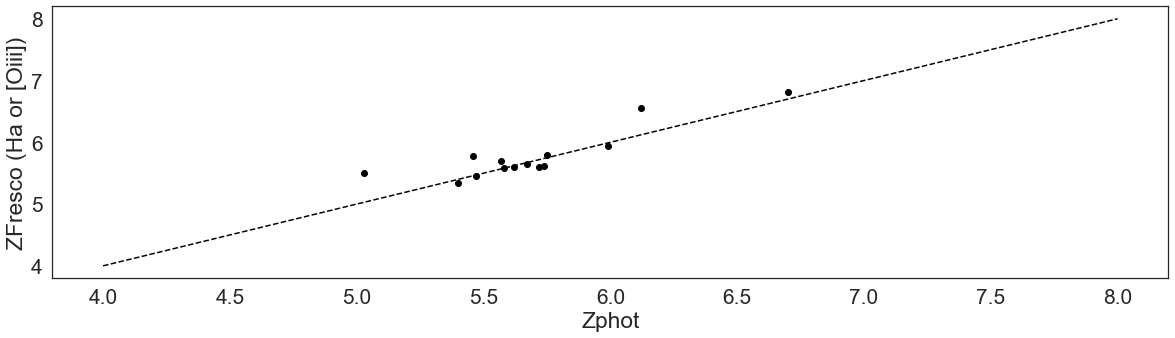

In [57]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
HaCat=ascii.read("../A-Catalogs/HaLines.cat")
mask=(HaCat["Ha"]!="X") ^ (HaCat["Oiii"]!="X")
HaCat=HaCat[mask]
for i in range(0,len(HaCat)):
    #print(ids[i],HaCat[i]["ID"],HaCat[i]["Ha"])
    zphot=CatBino[i]['photoz']
    zspec=np.nan

    if HaCat[i]["Ha"]=="X" and HaCat[i]["Oiii"]=="X":
        zspec=np.nan
    if HaCat[i]["Oiii"]=="X":
        zspec=(np.float(HaCat[i]["Ha"])/6564.614)-1
    elif HaCat[i]["Ha"]=="X":
        zspec=(np.float(HaCat[i]["Oiii"])/5006.8)-1
 

    plt.scatter(zphot,zspec,color="black")

plt.plot([4,8],[4,8],color="black",ls="--")
plt.xlabel("Zphot")
plt.ylabel("ZFresco (Ha or [Oiii])")
plt.show()



In [59]:
%load_ext autoreload
%autoreload
from photoObject import *
PObj=[]
HaCat=ascii.read("../A-Catalogs/HaLines.cat")
mask=(HaCat["Ha"]!="X") ^ (HaCat["Oiii"]!="X")
HaCat=HaCat[mask]
for i in range(0,len(HaCat)):
    if (HaCat[i]["Oiii"]!="X" or HaCat[i]["Ha"]!="X") and HaCat[i]["Flag"]<=2:
        print(CatBino[i]["id_charlotte"],HaCat[i]["ID"],Fresco[i]["id"])
        Other=[Fresco[i]["id"],CatBino[i]["z"],CatBino[i]["ra_candels"],CatBino[i]["dec_candels"]]
        PObj.append(PhotoObject(HaCat[i],Other))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GNW_14511 z6_GNW_14511 30244
z6_GND_36100 z6_GND_36100 29525
z6_GND_43125 z6_GND_43125 2432
z6_GND_36553 z6_GND_36553 29820
z5_GND_7766 z5_GND_7766 3869
z7_GND_8358 z7_GND_8358 4650
z5_GND_39445 z5_GND_39445 31564
z5_GND_27819 z5_GND_27819 23493
z5_GND_21153 z5_GND_21153 17353
z5_GND_17752 z5_GND_17752 13902
Stark11_43_3982 Stark11_43_3982 16141
Stark11_33_17705 Stark11_33_17705 21531
Stark11_34_24923 Stark11_34_24923 4427
Jung18_z6_GND_28438 Jung18_z6_GND_28438 24032


## Fitting

In [60]:
def FitGaussian(wave,Flux,FluxErr,lineWave,ShowPlots=True):
    inValues=[0,lineWave,20,0]
    labels = ["Amp","Mean", "FWHM","C"]
 
    stp=1500
    discard=1000
    walknum=50
    sampler,logprob=MCMC.runMCMC([wave,Flux,FluxErr],inValues,lineWave,steps=stp,nwalkers=walknum)
    if ShowPlots==True:
        #MCMC.plotChain(sampler,labels)
        #MCMC.plotCorner(sampler,labels,discard=discard)
        MCMC.plotModels(sampler,wave,Flux,FluxErr,discard=discard)

    pairs,ampVals,meanVals,stdVals,cVals=MCMC.returnParameters(sampler,discard=discard)
    return ampVals,meanVals,stdVals,cVals,pairs#betaVals[1],MuvVals[1],[betaErr,MuvErr],[Flux,FluxErr],pairs


In [61]:
def Gausiana(x,Amp,Mean,FWHM,C):
    fw_param=FWHM/(2*np.sqrt(2*np.log(2)))
    return (Amp/(fw_param*np.sqrt(2*np.pi))) * np.exp( -0.5 * (x-Mean)**2 / fw_param**2)  + C    

def SpecialkmsToangstrom(v,centralA):
    c=300000
    As = centralA*(v+c)/c
    return As

In [62]:
def SNR(wave,flux,err,zsys,fwhm_kms,line):
    L={"Ha":6564.614,"Oiii":5008.239}
    LineWave=L[line]*(1+zsys)
    FWHM=Tools.kmsToangstrom(fwhm_kms,LineWave)
    mask=(wave>LineWave-FWHM/2) & (wave<LineWave+FWHM/2)
    flux=flux[mask]
    err=err[mask]
    
    Signal=np.sum(flux)
    Noise=np.sqrt(np.sum(err**2))
    SNR=Signal/Noise


    return SNR

def retrievePairSTD(wave,pairs):
    gs=[]
    for i,s in enumerate(pairs):
        if i%50==0:
            gs.append(Gausiana(wave,*s)-s[3])
    FitAreaSTD=[]
    for point in np.transpose(gs):
        FitAreaSTD.append(np.std(point))
    FitAreaSTD=np.array(FitAreaSTD)
    return FitAreaSTD

def fix_XTicks(ticks,typeOfData):
    if typeOfData=='wave':
        for t in ticks[:-1]:
            if np.abs(ticks[-1]-t)<3:
                ticks=ticks[ticks!=t]
        
        newt=[]
        for t in ticks:
            if t%5==0:
                newt.append(int(t))
            else:
                newt.append(np.round(t,2))

        print(newt)
        return newt

    if typeOfData=='kms':
        for t in ticks[:-1]:
            if np.abs(ticks[-1]-t)<1:
                ticks=ticks[ticks!=t]
        return ticks

def fix_XticksVelocities(cLambda,typeOfData):
    if typeOfData=='kms':
        labels=np.linspace(-3500,3500,11)
        ticks=[]
        for l in labels:
            ticks.append(SpecialkmsToangstrom(l,cLambda))

        return ticks,labels.astype(int)

In [63]:
FrescoCat=ReadCatalogs("../A-Catalogs/Fresco_latest.cat")
FrescoBino_counterpart={}
for gal in PObj:
    idx,d2d=xmatch.xmatch(gal.ra,gal.dec,FrescoCat["ra"],FrescoCat["dec"])
    FrescoBino_counterpart[gal.ID]="{:05d}".format(FrescoCat[idx]["id"])
    

<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  4%|▎         | 54/1500 [00:00<00:02, 534.50it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
z6_GNW_14511
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 435.00it/s]


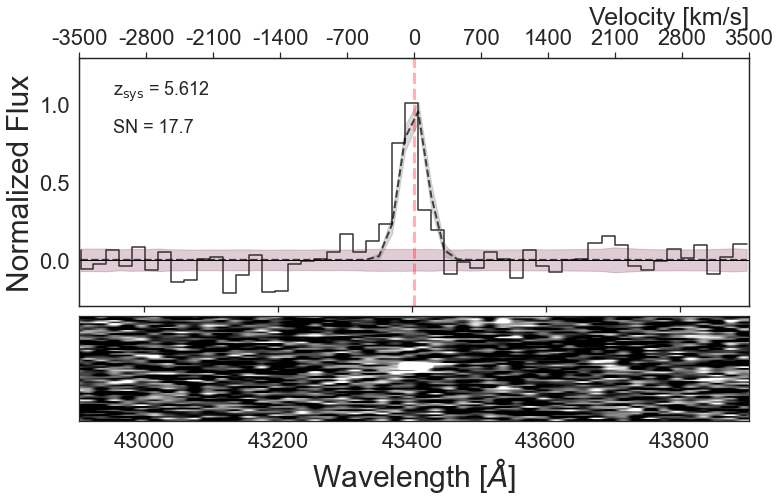

<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 45/1500 [00:00<00:03, 439.29it/s]

z6_GND_36100
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 457.05it/s]


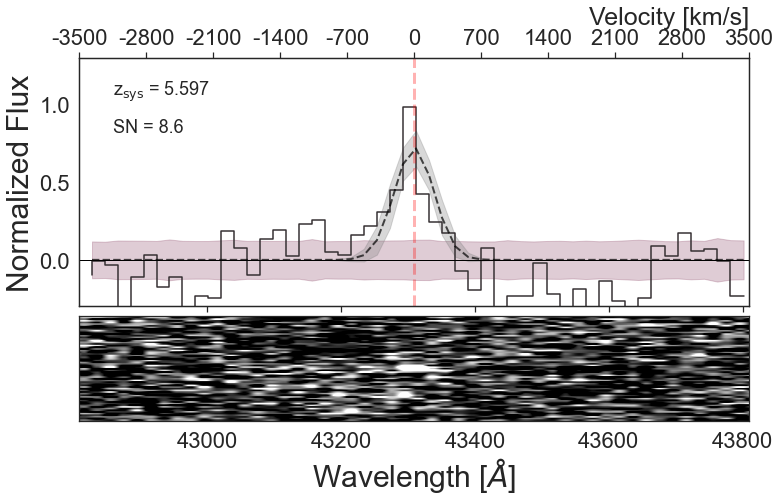

<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 45/1500 [00:00<00:03, 443.90it/s]

z6_GND_43125
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 447.09it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 44/1500 [00:00<00:03, 433.93it/s]

z6_GND_36553
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 430.37it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 42/1500 [00:00<00:03, 413.53it/s]

z5_GND_7766
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 468.94it/s]


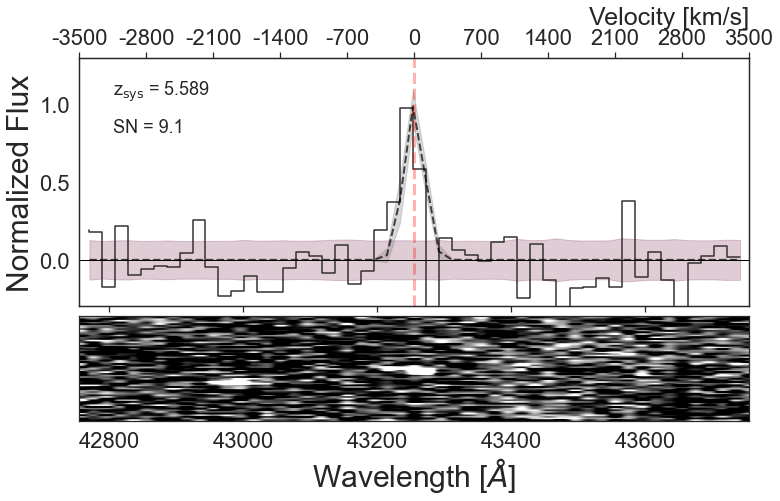

<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 40/1500 [00:00<00:03, 396.99it/s]

z7_GND_8358
Line Being Used:  Oiii


100%|██████████| 1500/1500 [00:03<00:00, 449.52it/s]


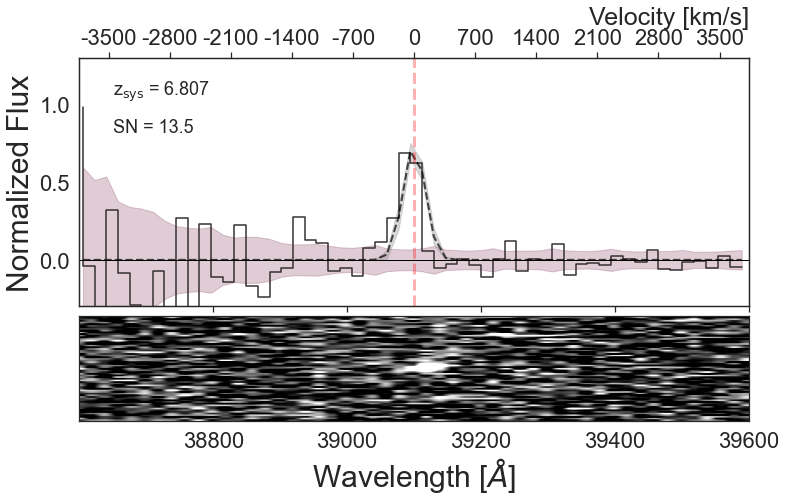

<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 53/1500 [00:00<00:02, 519.26it/s]

z5_GND_39445
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 478.54it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 49/1500 [00:00<00:02, 487.42it/s]

z5_GND_27819
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 488.74it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 52/1500 [00:00<00:02, 512.22it/s]

z5_GND_21153
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 486.92it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 54/1500 [00:00<00:02, 536.36it/s]

z5_GND_17752
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 501.29it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 42/1500 [00:00<00:03, 418.49it/s]

Stark11_43_3982
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:02<00:00, 508.77it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 48/1500 [00:00<00:03, 474.62it/s]

Stark11_33_17705
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 487.76it/s]


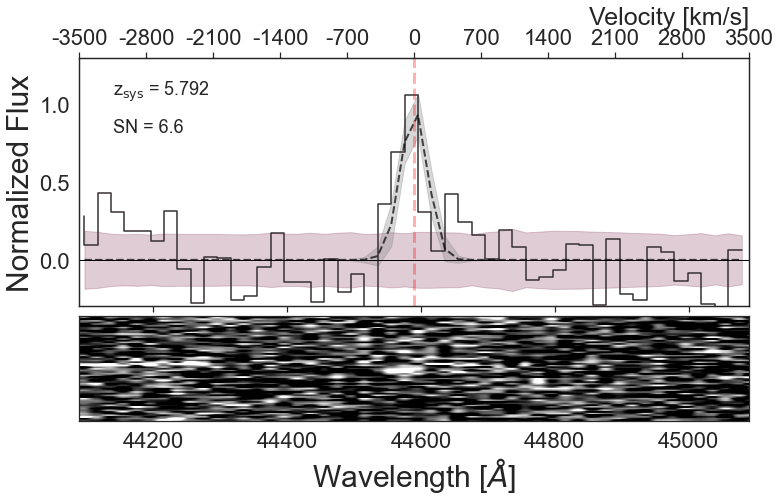

<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 52/1500 [00:00<00:02, 517.96it/s]

Stark11_34_24923
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 465.07it/s]


<ipython-input-99-41712b682107>:14: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
  0%|          | 0/1500 [00:00<?, ?it/s]/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▎         | 53/1500 [00:00<00:02, 527.89it/s]

Jung18_z6_GND_28438
Line Being Used:  Ha


100%|██████████| 1500/1500 [00:03<00:00, 377.90it/s]


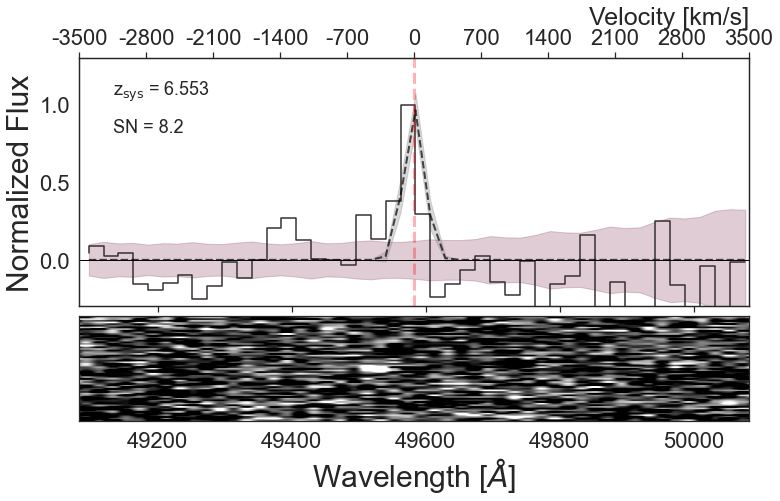

In [99]:
%load_ext autoreload
%autoreload
sns.set_theme(style="white",font_scale = 2)
plt.rcParams["figure.figsize"] = (12,8)

run=True
LineUsed=[]
if run==True:
    ln=["Ha","Oiii"]
    for gal in PObj[:]:
        print(gal.ID)
        f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+f"{gal.IDFresco:05}"+".1D.fits")
        f2D=fits.open("../data/large_files/Fresco/2D/fresco-only-n-v2_"+str(FrescoBino_counterpart[gal.ID])+".stack.fits")
        wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18

        tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        tempA={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
        for l in ln:
            if getattr(gal, "aWave"+l)=="X":
                continue
            LineUsed.append(l)
            gal.WhichLine(l)
            print("Line Being Used: ",l)
            
            approxWave=float(getattr(gal, "aWave"+l))
            mask=(wave>approxWave-200)&(wave<approxWave+200) &(np.isnan(flux)==False)




            showMe=False
            if l=="Oiii":
                showMe=False

            a,m,s,c,pairs=FitGaussian(wave[mask],flux[mask],err[mask],approxWave,ShowPlots=False)
            tempM[l]=m
            tempA[l]=a
            tempS[l]=s
        gal.giveWave(tempM)
        gal.giveFWHM(tempS)
        gal.giveAmplitude(tempA)
        #gal.getFWHM()
        gal.getOffset()
        
        fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True)
        ax2 = ax1.twiny()
        mask=(wave>m[1]-500)&(wave<m[1]+500)
        norm=flux[mask].max()

        ax1.step(wave[mask],(flux[mask]-c[1])/norm,color='#342E31',label='Flux')
        ax1.axhline(y=0,color='black',lw=1)
        ax1.fill_between(wave[mask],err[mask]/norm,-err[mask]/norm,color='#630330',alpha=0.2,zorder=-10)
        ax1.text(  # position text relative to Axes
                        0.05, 0.85, r'z$_\mathrm{sys}$ = '+str(np.round(gal.zsys[1],3)),
                        transform=ax1.transAxes, size=18
        )

        fwidth=np.nan
        if np.isnan(fwidth)==True:
            fwidth=Tools.angstromTokms(m[1],s[1]/2.0)*2



        SN=SNR(wave[mask],flux[mask],err[mask],gal.zsys[1],fwidth,gal.LineName)
        ax1.text(0.05, 0.7,s=r"SN = "+str(np.round(SN,1)),transform=ax1.transAxes,fontsize=18)

        gausiana=Gausiana(wave[mask],*np.median(np.transpose(pairs),axis=1))-c[1]
        FitAreaSTD=retrievePairSTD(wave[mask],pairs)





        ax1.plot(wave[mask],gausiana/norm,'black',ls="--",lw=2,alpha=0.7)
        ax1.fill_between(wave[mask], (gausiana-FitAreaSTD)/norm, (gausiana+FitAreaSTD)/norm,color="gray",alpha=0.3)
        ax1.axvline(x=m[1],ls="--",color="red",alpha=0.3,lw=3)


        ax3.imshow(f2D[1].data,extent=[min(wave),max(wave),-np.shape(f2D[1].data)[1]/2,np.shape(f2D[1].data)[1]/2],aspect=0.25,cmap='gray',vmin=-0.5*np.std(f2D[1].data),vmax=2*np.std(f2D[1].data))
        ax1.set_xlim(m[1]-500,m[1]+500)
        ax1.set_ylim(-0.3,1.3)
        ax1.set_yticks([0, 0.5, 1])

        ax3.set_yticks([])
        ax3.set_xlabel(r"Wavelength [$\AA$]",fontsize=30)
        ax1.set_ylabel("Normalized Flux",fontsize=30)#(r"Flux [1e-18 erg/s/cm$^2/\AA$]")
        ax2.set_xlabel("Velocity [km/s]",loc='right',fontsize=25)
        #ax1.set_title(str(gal.ID),fontsize=30,loc='left')



        ax2.set_xticks(ax1.get_xticks())
        ax2.set_xbound(ax1.get_xbound())
        ax2.set_xticklabels([ np.round(angstromTokms(m[1],w),2) for w in ax1.get_xticks()])

        
        ax2.set_xticks(fix_XticksVelocities(m[1],'kms')[0])
        ax2.set_xticklabels(fix_XticksVelocities(m[1],'kms')[1])
        #ax2.set_xlim(m[1]-500,m[1]+500)
        plt.subplots_adjust(wspace=-0.25, hspace=-0.25)
        plt.savefig('../G-Plots/ForPaper/Optical/'+str(gal.ID)+".pdf",dpi=200, bbox_inches = "tight")
        #plt.clf()
        plt.show()



    #[gal.getOffset() for gal in PObj]
    #[gal.getFWHM() for gal in PObj]
    #[gal.getFlux() for gal in PObj]
    #noLyaHa=[]
    #for gal in PObj:
    #    noLyaHa.append({"ID":gal.ID,"HaFlux":[gal.flux,gal.dflux],"HaFWHM":[gal.fwhm,gal.dfwhm],"Off":[gal.off,gal.doff],"zsys":gal.zsys})

    #np.save("../A-Catalogs/ForMaster/Any.npy",noLyaHa)

In [16]:
len(noLyaHa)

10

In [84]:
noLyaHa=np.load("../Catalogs/ForMaster/noLyaHa.npy",allow_pickle=True)
PhotCat=fits.open("../Catalogs/fresco-gn_imgv7.2_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")
c= 2.99792458e+18
EWHa=[]
i=0
for gal in PObj[:]:
    #print(gal.ID,gal.IDFresco,(1+gal.zLya)*6564.614) # All in F444
    if LineUsed[i]=="Ha":
        for phot in PhotCat[1].data:
            if gal.IDFresco==phot["id"]:
                ha=noLyaHa[i]["HaFlux"][0]
                dha=noLyaHa[i]["HaFlux"][1]
                z=noLyaHa[i]["zsys"][1]
                cont=((phot["f_f444w"]*1e-32*c/((1+z)*6564.614)**2)*10676-ha)/10676
                econt=cont- (((  (phot["f_f444w"]-phot["e_f444w"])      *1e-32*c/((1+z)*6564.614)**2)*10676-ha)/10676)

                ew=ha/(cont)
                ew_rest=ew/(1+z)

                dew=ew*np.sqrt(  (dha/ha)**2 + (econt/cont)**2 )
                dew_rest=dew/(1+z)
                if ew_rest<0:
                    ew_rest=np.nan
                    dew_rest=np.nan
                EWHa.append([ew_rest,dew_rest])
                print(gal.ID,gal.IDFresco,z,(1+z)*4000,phot["f_f444w"],ew_rest,dew_rest) #micro Jy

        noLyaHa[i]["EWHa"]=[ew_rest,dew_rest]
    if LineUsed[i]=="Oiii":
        noLyaHa[i]["EWHa"]=[np.nan,np.nan]
    noLyaHa[i]["line"]=LineUsed[i]
    i=i+1
np.save("../Catalogs/ForMaster/noLyaHa.npy",noLyaHa)

z6_GND_16819 13046 5.30715415766223 25228.616630648918 940.2666371796132 221.57122657151172 16.319499486888663
z5_GND_14430 10916 5.2413136863000505 24965.254745200204 373.43666092697634 116.65898251279916 16.458553789781664
z5_GND_30190 25365 5.172143195679631 24688.572782718522 69.4900346630122 377.8470005282746 79.16695596308995
z5_GND_42418 1846 5.194129433602294 24776.517734409175 704.6675174841475 145.6261024770759 11.052028996662749
z5_GND_15562 11949 5.422913713190561 25691.654852762244 112.79394090385878 714.7744036087256 210.87802759779518
z6_GND_25736 21755 5.331282659246409 25325.130636985636 426.9261242333103 154.09132738270864 18.26042848390531
z6_GND_25400 21512 5.651776672972265 26607.10669188906 114.82183008099007 313.1556475594395 66.89457029498091
z6_GND_3649 32657 5.782828138398909 27131.312553595635 -99.0 nan nan
z5_GND_32273 26849 5.308411684925374 25233.646739701497 442.73847111800893 231.5002228029741 24.422131735042917
z6_GND_25195 21339 5.361964124280825 25447

# Get Flux Limits

Three cases:

- If it has a match : inFresco
    Here I go to where i expect there to be Halpha and use the distribution of FWHM to randomly draw a fwhm, then add error in quadrature.

This is the 1sigma flux limit, then multiply by 5

Get EWHa limit


- If it has no match : in FoV
    Here I should ....

- If it is outside FoV : noFresco
    Here I dont give any fluxlimit

In [85]:
lines=ascii.read("../Catalogs/HaLinesNonDetect.cat")
count=0
noLAEHaLim=[]
Limits=[]
for i in ids:
    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
        f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+i+".1D.fits")
        wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
        FWHM=np.random.normal(loc=375, scale=115, size=1000)
        Ha=6564.614*(1+CatBino[count]['photoz'])
        
        m=(wave>Ha-100) & (wave<Ha+100)
        if len(wave[m])==0:
            bin_size=18
        else:
            bin_size=wave[m][6]-wave[m][5]
        listOfErrors=[]

        for fwhm in FWHM:
            edge=(Tools.kmsToangstrom(fwhm,Ha))
            mask=(wave>Ha-edge) & (wave<Ha+edge)
            ERR=err[mask]*1e-18
            #WAVE=wave[mask]
            FLX=flux[mask]*1e-18

            #print(FLX)
            sum=np.sqrt(np.sum(ERR**2))*5*bin_size # by 
            if sum==0:
                sum=np.nan
            listOfErrors.append(sum)
        FluxLimit=np.nanmean(listOfErrors)
        print(CatBino[count]['id_charlotte'],FluxLimit)
        Limits.append(FluxLimit)
        noLAEHaLim.append({"ID":CatBino[count]["id_charlotte"],"FrescoID":i,"HaFlux":[FluxLimit,np.nan],"z":CatBino[count]['photoz']})
    count+=1

<ipython-input-85-c16fba8ee02d>:8: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
<ipython-input-85-c16fba8ee02d>:31: RuntimeWarning: Mean of empty slice
  FluxLimit=np.nanmean(listOfErrors)


z5_GND_44499 1.8193340567640345e-18
z6_GND_20879 2.3295996095742763e-18
z6_GNW_11480 2.4780426749703825e-18
z6_GND_32408 2.6129222514261847e-18
z6_GND_31259 2.4736864476839098e-18
z6_GND_11304 nan
z6_GND_10245 nan
z7_GND_42808 nan
z7_GND_16759 nan
z5_GND_15899 1.752435880066084e-18
z5_GND_9333 1.4918826502806313e-18
z5_GND_7157 2.412053016707919e-18
z5_GND_28693 1.771479598250913e-18
z5_GND_17105 1.4077722312665126e-18
z7_GND_15396 nan
z7_GND_7831 nan
z7_GND_20984 nan


In [86]:
Measurements=[]
Catalog=ascii.read("../Catalogs/Binospec-Candels.cat")
for gal in Catalog:
    if gal["dHaFlux"]<0:
        Measurements.append(gal["HaFlux"])



(array([0., 0., 0., 0., 0., 5., 5., 0., 0., 0.]),
 array([-19.5, -19.2, -18.9, -18.6, -18.3, -18. , -17.7, -17.4, -17.1,
        -16.8, -16.5]),
 <BarContainer object of 10 artists>)

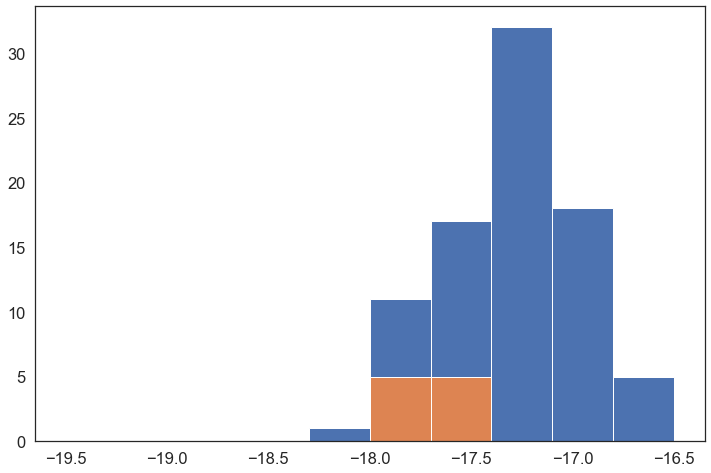

In [87]:
plt.hist(Measurements,range=[-19.5,-16.5],bins=10)
plt.hist(np.log10(Limits),range=[-19.5,-16.5])

In [88]:
PhotCat=fits.open("../Catalogs/fresco-gn_imgv7.2_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")
AllnoLyaHa=[]
c= 2.99792458e+18
EWHa=[]
i=0
for gal in noLAEHaLim:
    #print(gal.ID,gal.IDFresco,(1+gal.zLya)*6564.614) # All in F444
    x=0
    for phot in PhotCat[1].data:
        if int(gal["FrescoID"])==phot["id"]:
            x=1
            ha=gal["HaFlux"][0]
            dha=gal["HaFlux"][1]

            cont=((phot["f_f444w"]*1e-32*c/((1+gal["z"])*6564.614)**2)*10676-ha)/10676
            econt=cont- (((  (phot["f_f444w"]-phot["e_f444w"])      *1e-32*c/((1+gal["z"])*6564.614)**2)*10676-ha)/10676)

            ew=ha/(cont)
            ew_rest=ew/(1+gal["z"])

            dew=ew*np.sqrt(  (dha/ha)**2 + (econt/cont)**2 )
            dew_rest=dew/(1+gal["z"])
            print(ew_rest,dew_rest) #micro Jy
            EWHa.append([ew_rest,dew_rest])
    if x==0:
        print("not found: ",gal["FrescoID"])
    noLAEHaLim[i]["EWHa"]=[ew_rest,dew_rest]
    noLAEHaLim[i]["line"]="Ha"
    noLAEHaLim[i]["HaFWHM"]=[np.nan,np.nan]
    noLAEHaLim[i]["Off"]=[np.nan,np.nan]
    noLAEHaLim[i]["zsys"]=[np.nan,np.nan]

    i=i+1

[AllnoLyaHa.append(gal) for gal in noLyaHa]
[AllnoLyaHa.append(gal) for gal in noLAEHaLim]

np.save("../Catalogs/ForMaster/noLyaHa.npy",AllnoLyaHa)

65.31180415174559 nan
311.07252555336675 nan
197.1504638135344 nan
341.5969151314426 nan
165.85624107650384 nan
nan nan
nan nan
nan nan
nan nan
162.50920377883818 nan
249.19280596851718 nan
405.113633786229 nan
738.2895100318381 nan
260.73308105351083 nan
nan nan
nan nan
nan nan


z6_GND_16819 5.308520196313142  Lya :  7666.744594579362


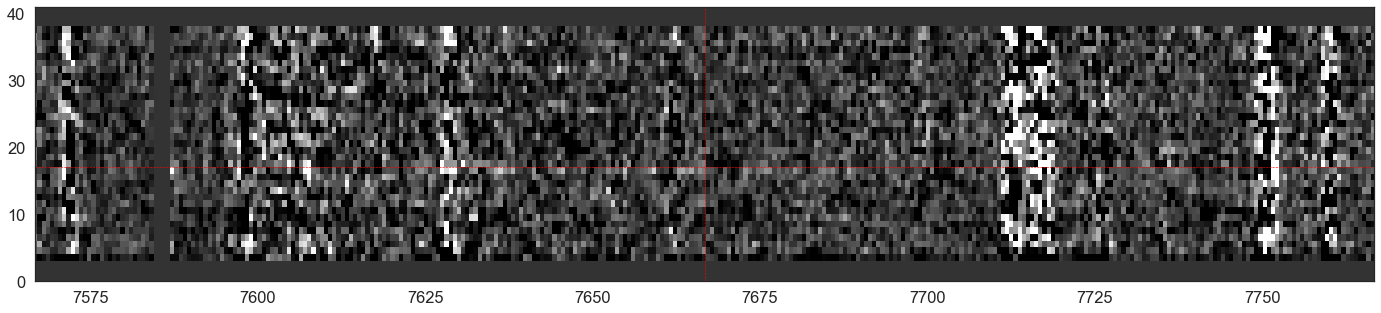

z5_GND_14430 5.242865155514095  Lya :  7586.95402349628


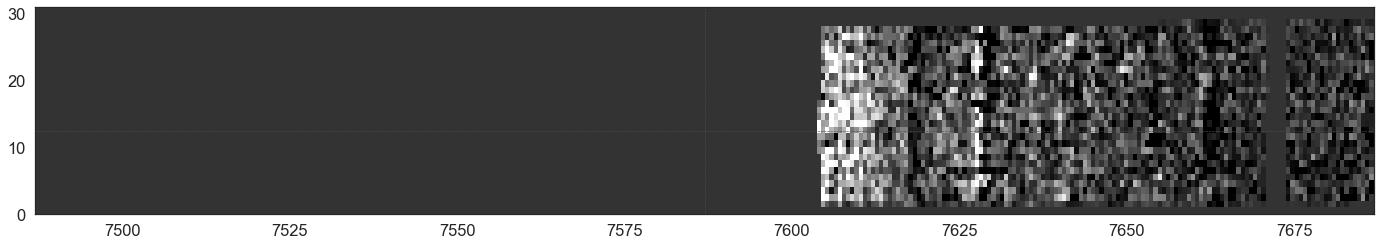

z5_GND_30190 5.175229800259391  Lya :  7504.756776255238


z5_GND_42418 5.19792725055883  Lya :  7532.340987604145


z5_GND_15562 5.426272740484056  Lya :  7809.849261510273


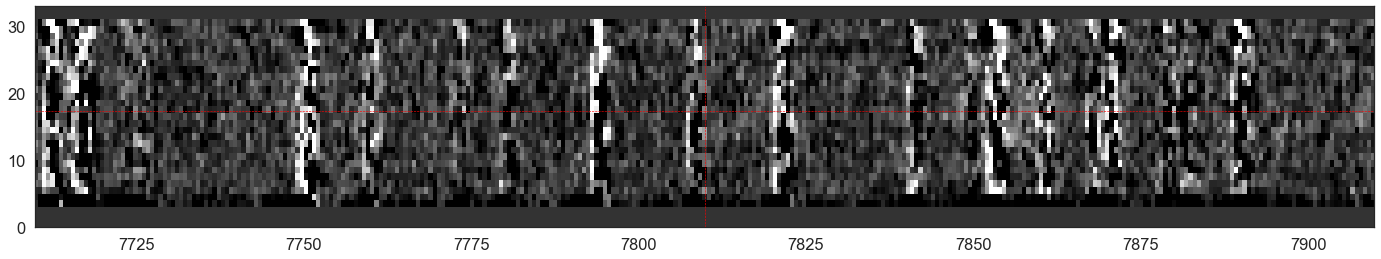

z6_GND_25736 5.331522310374989  Lya :  7694.699063798725


z6_GND_25400 5.652333252191219  Lya :  8084.580601387987


z6_GND_3649 5.78135835557125  Lya :  8241.38480952574


z5_GND_32273 5.308367864431938  Lya :  7666.559465644134


z6_GND_25195 5.363664337309094  Lya :  7733.761269131742


z6_GND_27453 5.611965303672083  Lya :  8035.521433552682


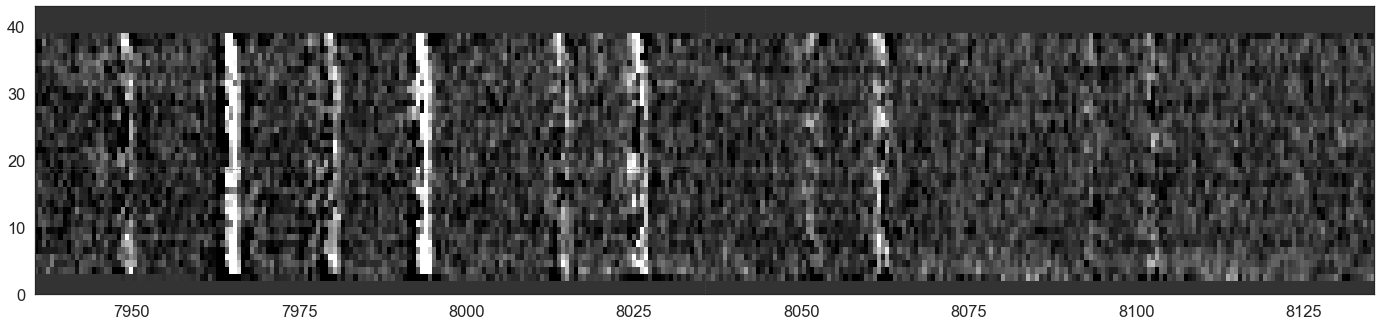

z6_GND_19665 5.180256752339132  Lya :  7510.866031117747


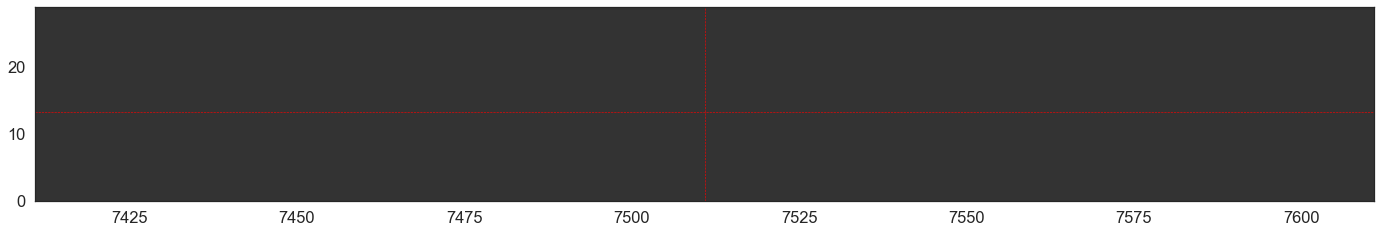

z6_GND_11494 5.778464049828368  Lya :  8237.867359756416


z6_GND_8934 5.968726569452523  Lya :  8469.09339985565


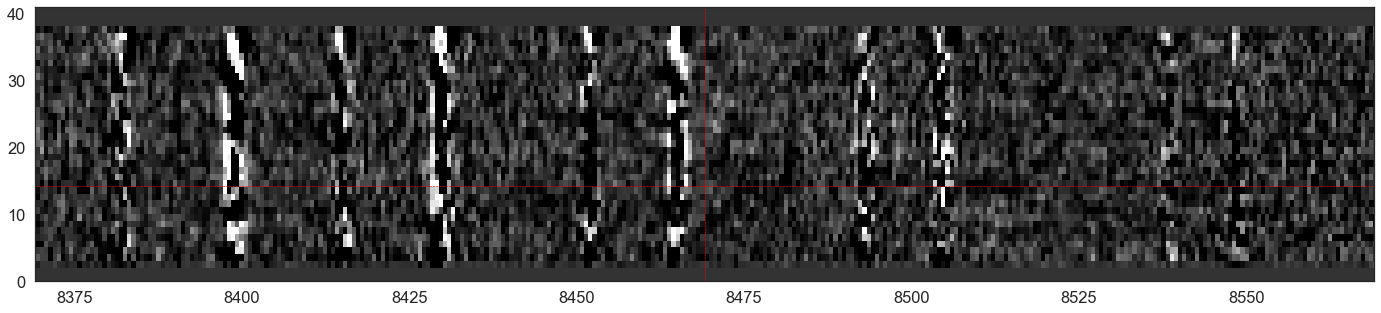

z5_GND_10574 5.303950239877014  Lya :  7661.1907265225345


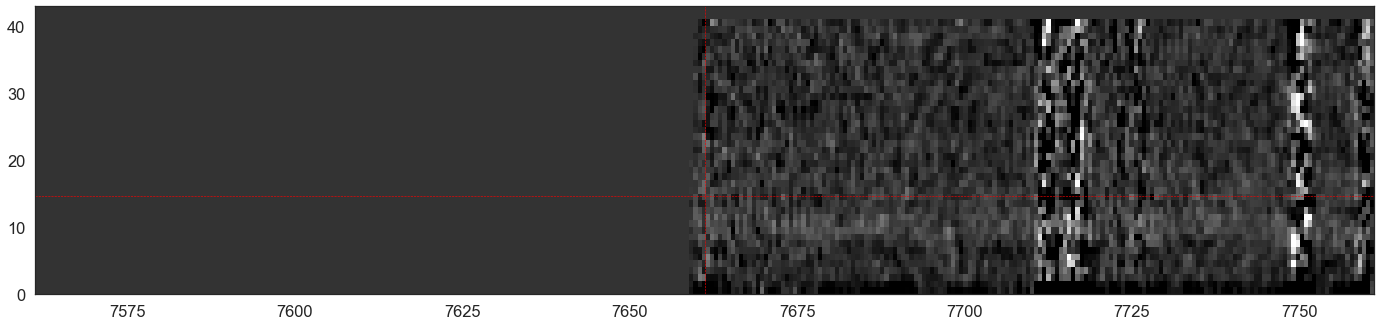

z6_GND_10131 5.187721014518143  Lya :  7519.9373489438985


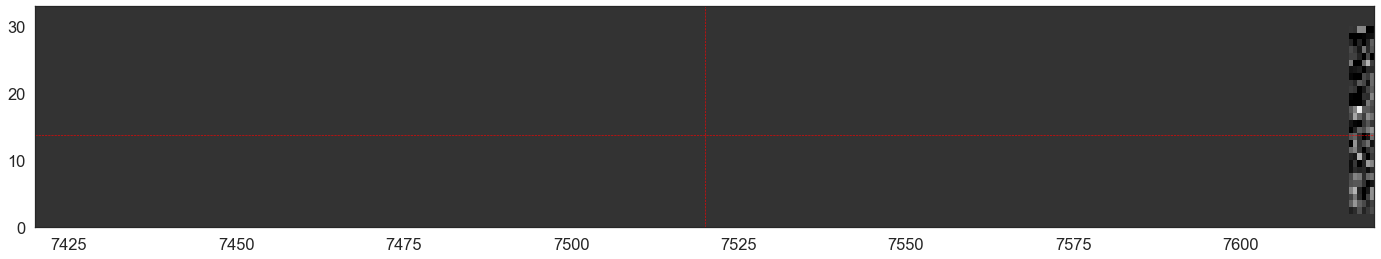

z6_GND_41463 5.659340518726616  Lya :  8093.0965324084555


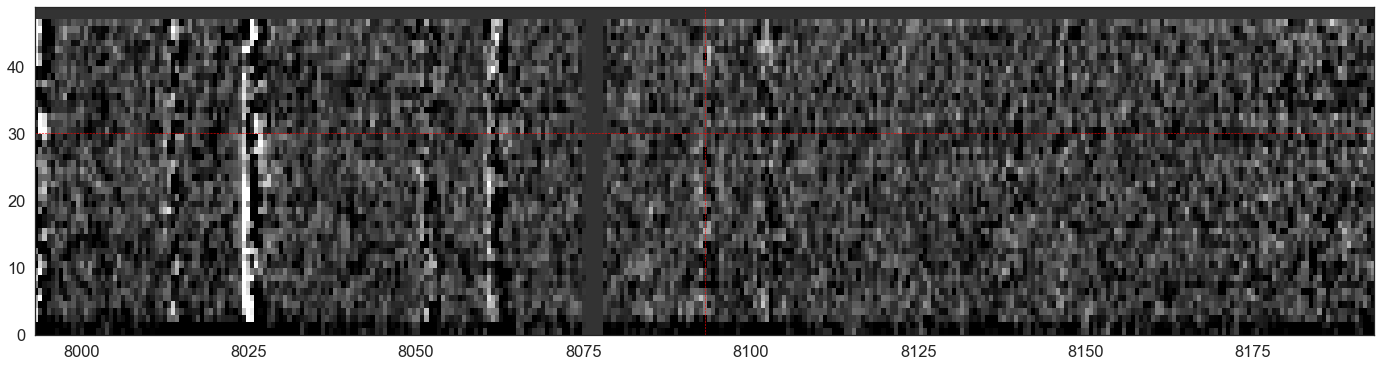

z6_GND_36607 5.603891713968255  Lya :  8025.70959998562


z6_GND_28182 5.984721416978973  Lya :  8488.531938054544


z6_GND_20167 5.024725901629555  Lya :  7321.849388250398


z6_GND_22665 5.299380283440885  Lya :  7655.6368584657075


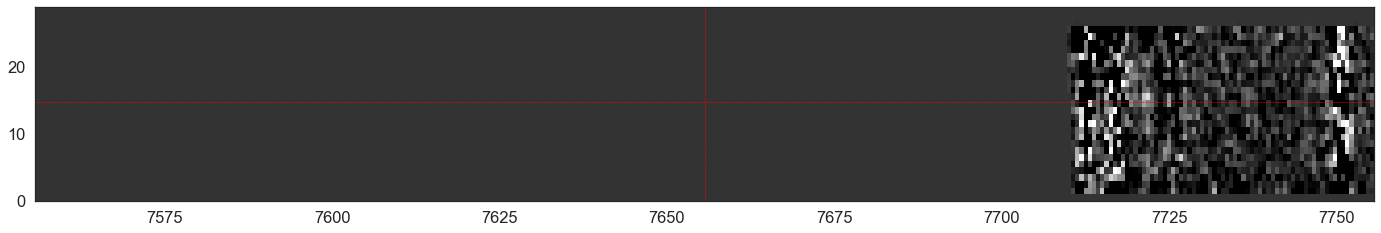

z6_GND_22789 5.450645841476742  Lya :  7839.469891146685


z7_GND_22525 6.7853712652291565  Lya :  7218.362313458187


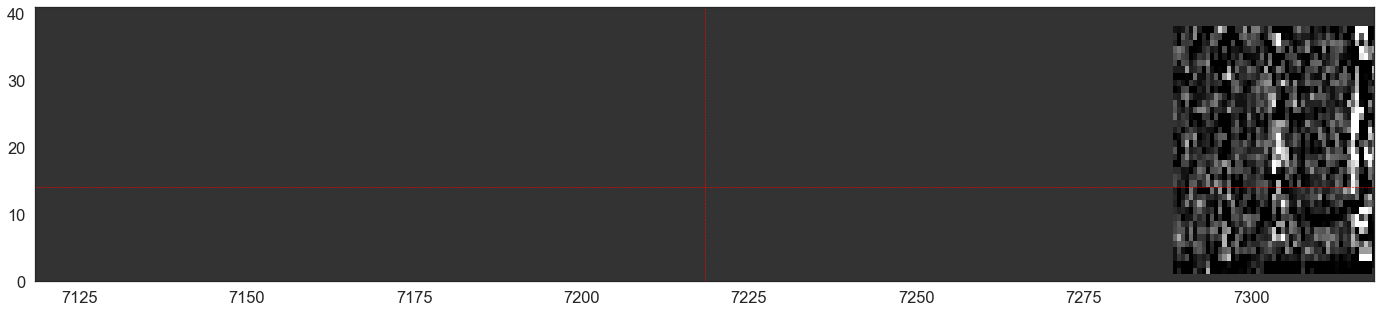

z7_GND_34860 7.031765257209171  Lya :  7446.811419529009


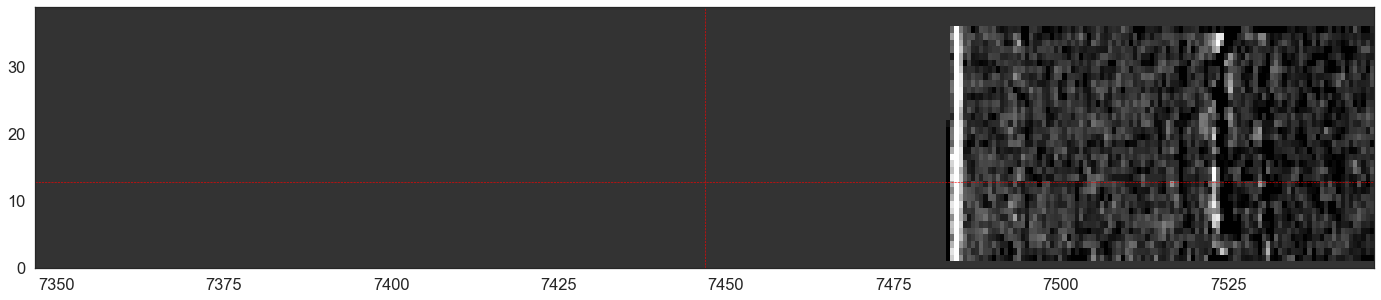

z7_GND_34730 6.557946285950705  Lya :  9185.172121315893


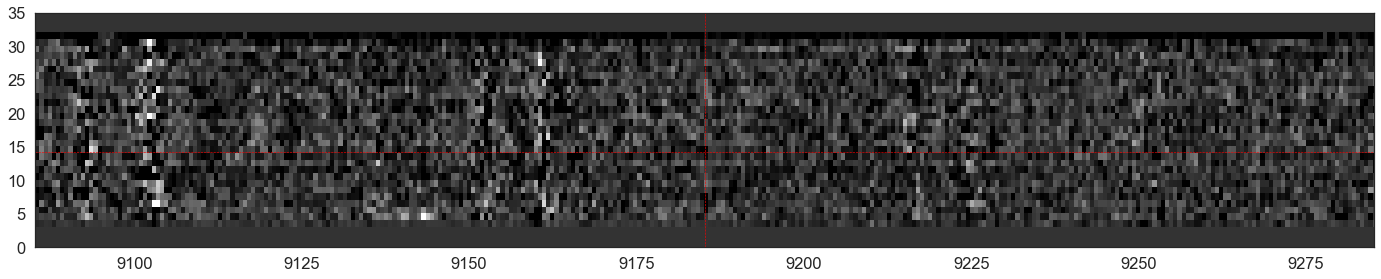

z5_GND_13996 6.016863443913078  Lya :  8527.594143387563


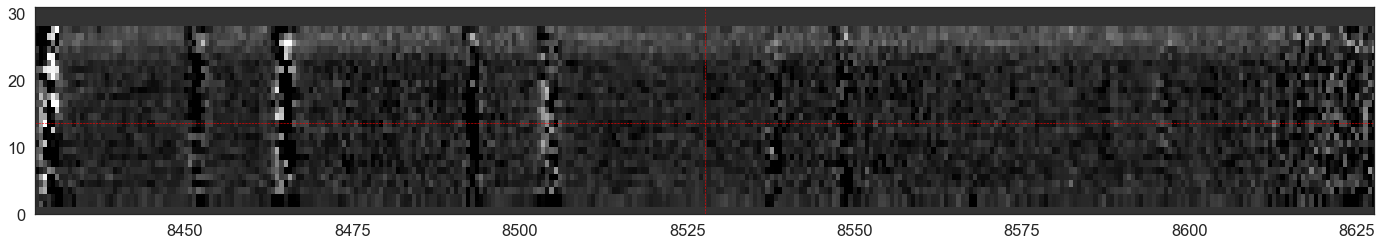

z6_GND_7095 6.564648888723694  Lya :  9193.317794465906


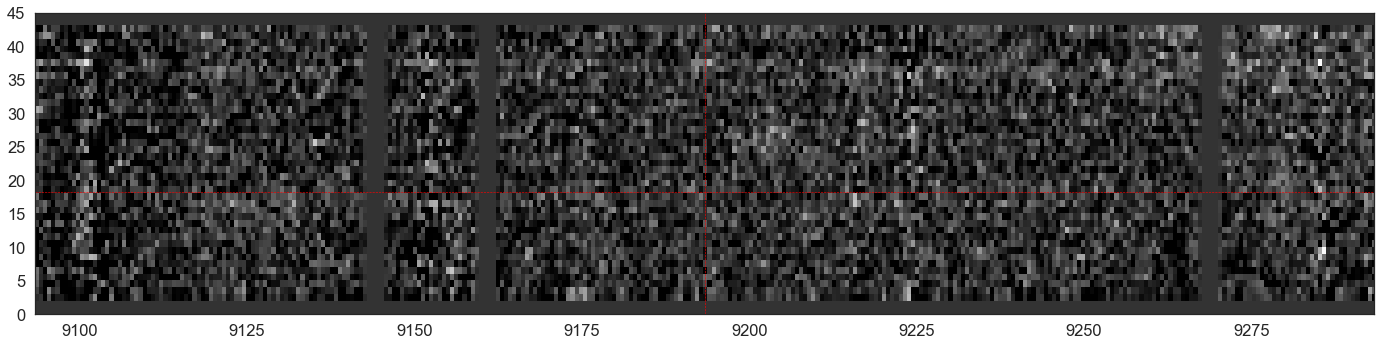

z7_GND_41647 6.56876184951621  Lya :  9198.31627571705


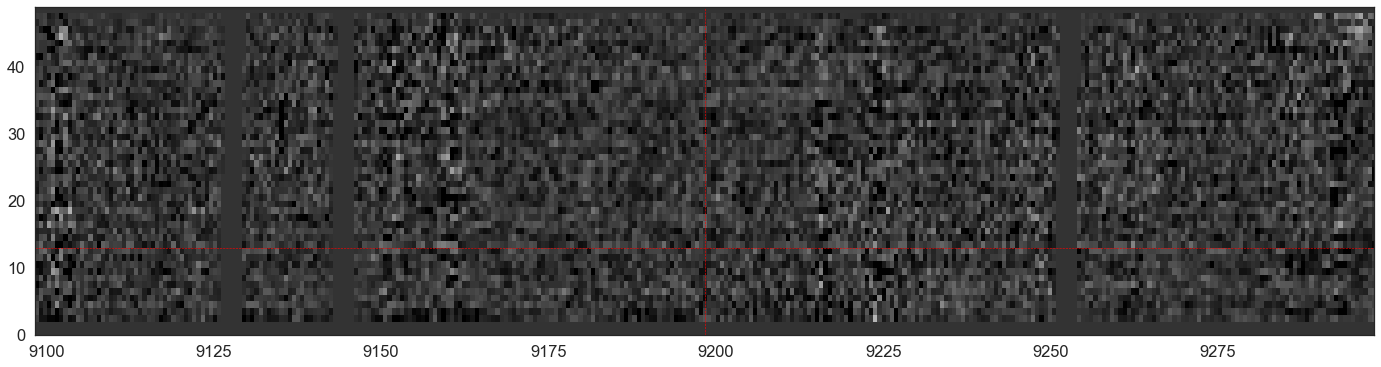

z7_GND_15642 4.921292554291845  Lya :  7196.146841230879


z6_GNW_8973 5.313242484630475  Lya :  7672.483591571416


z5_GNW_13431 5.164261904812682  Lya :  7491.427492918852


z5_GND_45250 5.147505397880211  Lya :  7471.063310043821


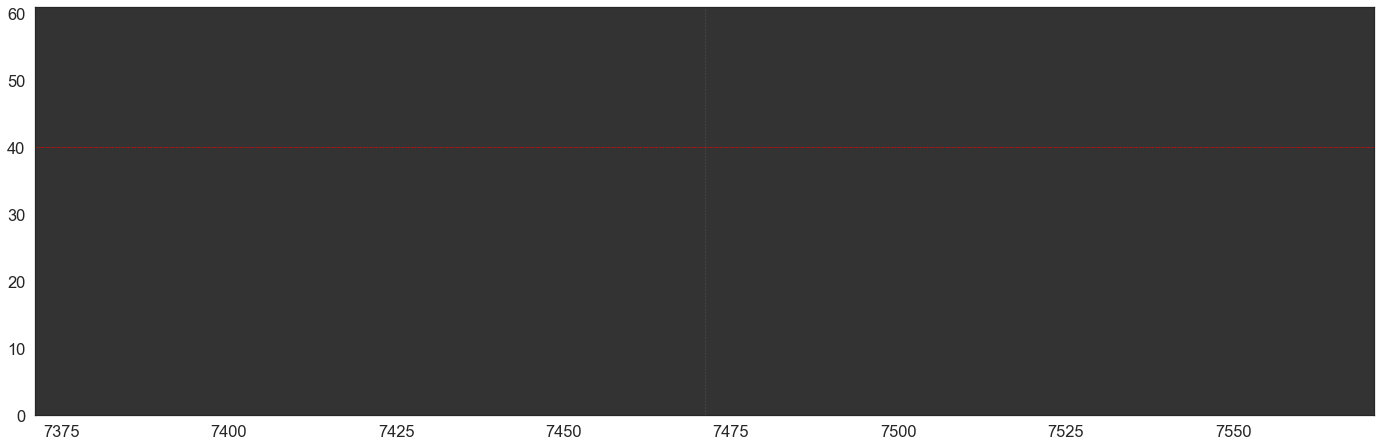

z5_GND_32576 5.223823670363559  Lya :  7563.812906592832


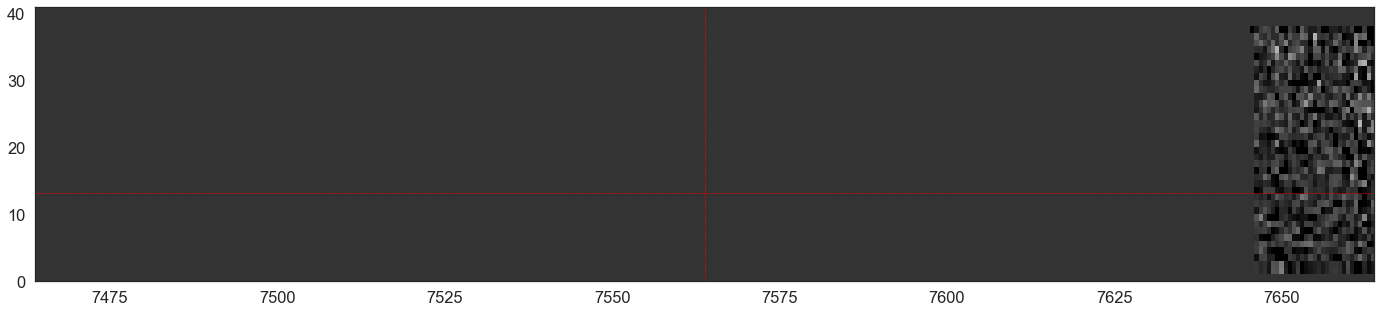

z5_GND_28421 5.200821556301712  Lya :  7535.85843737347


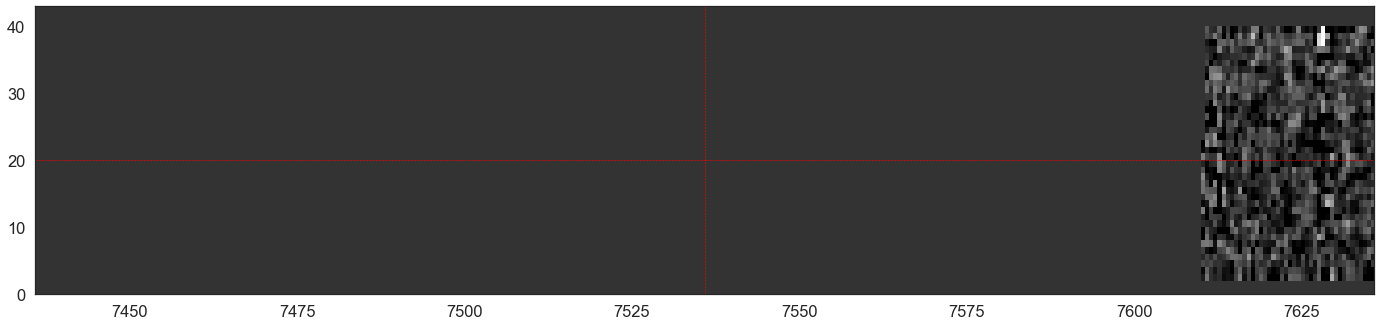

z5_GND_24948 5.189092001448981  Lya :  7521.603509360946


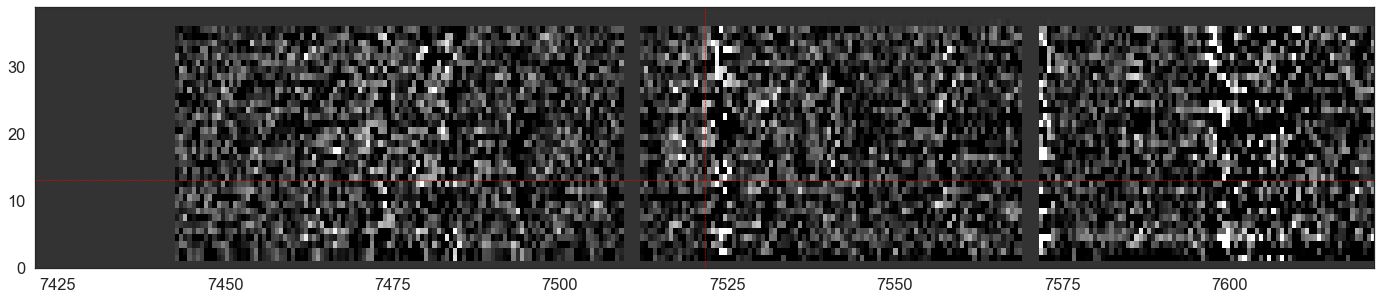

z5_GND_28981 5.226108648581623  Lya :  7566.589840621246


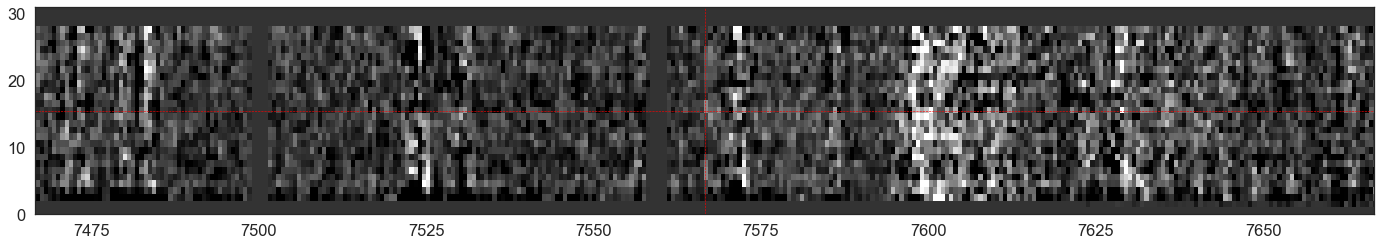

z5_GND_18617 5.315527462848539  Lya :  7675.26052559983


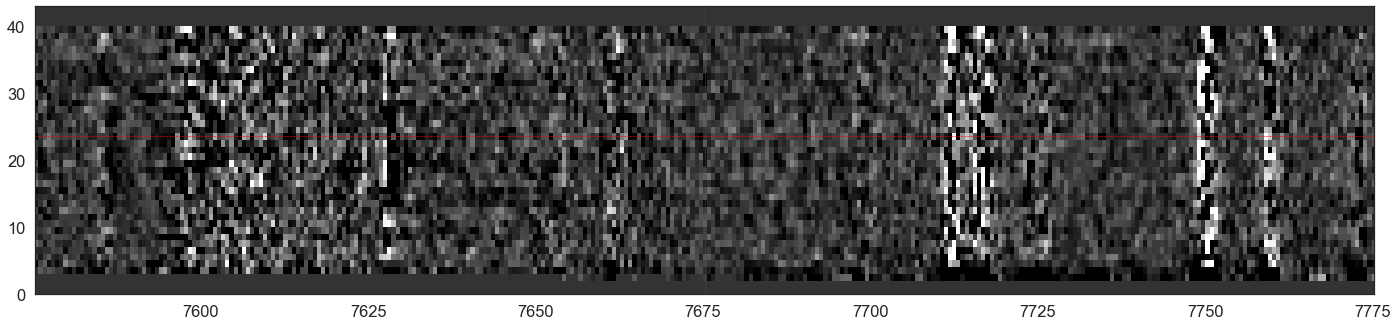

z5_GND_20890 5.226870307987644  Lya :  7567.515485297384


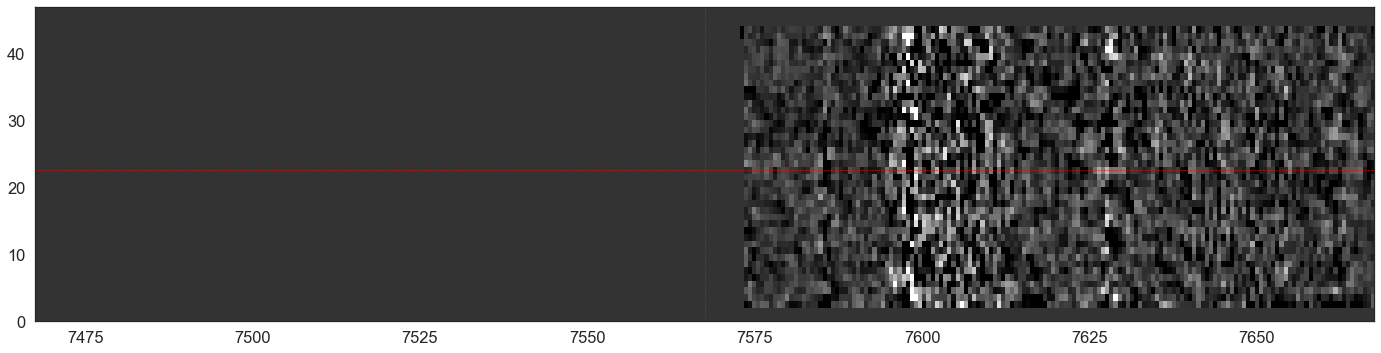

z5_GND_16389 5.226108648581623  Lya :  7566.589840621246


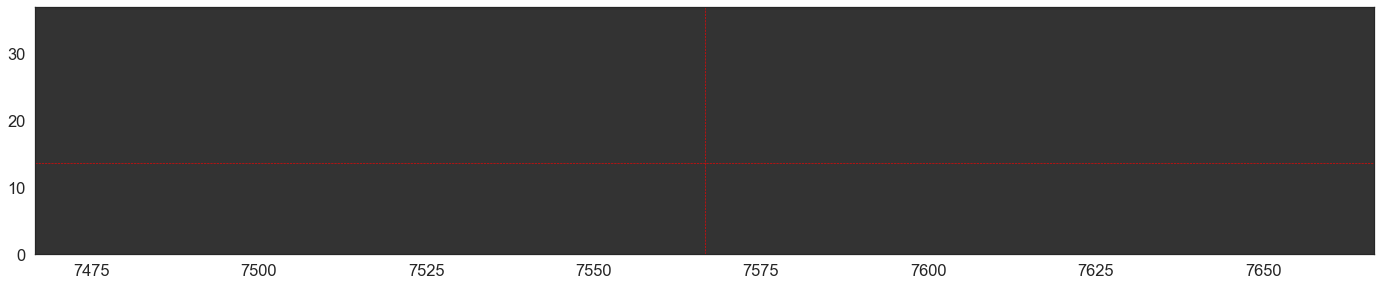

z5_GND_15025 5.191681643429454  Lya :  7524.750701259814


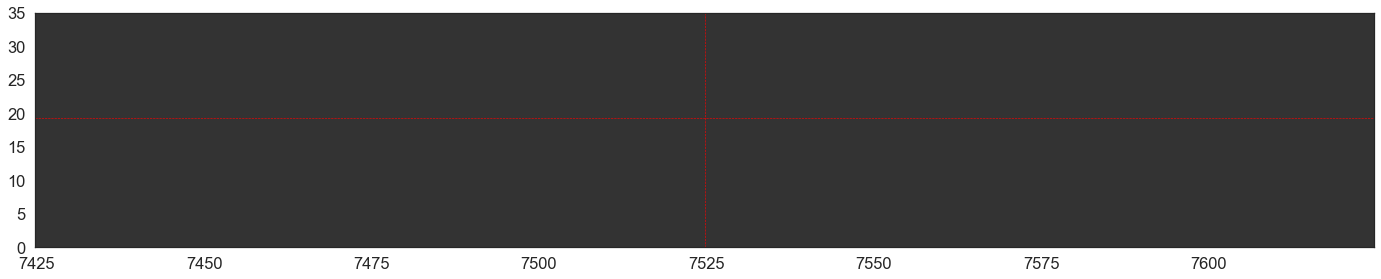

z6_GND_13524 5.198536578083647  Lya :  7533.081503345056


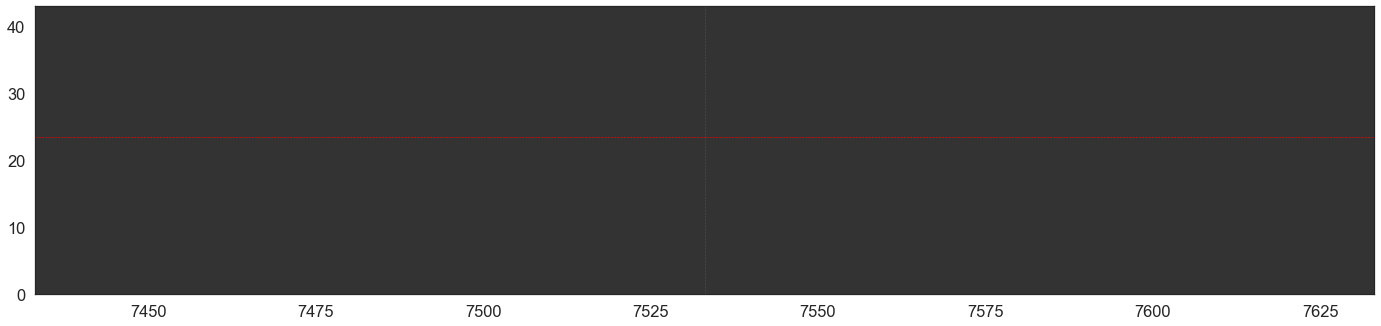

z5_GND_14131 5.196251599865583  Lya :  7530.304569316643


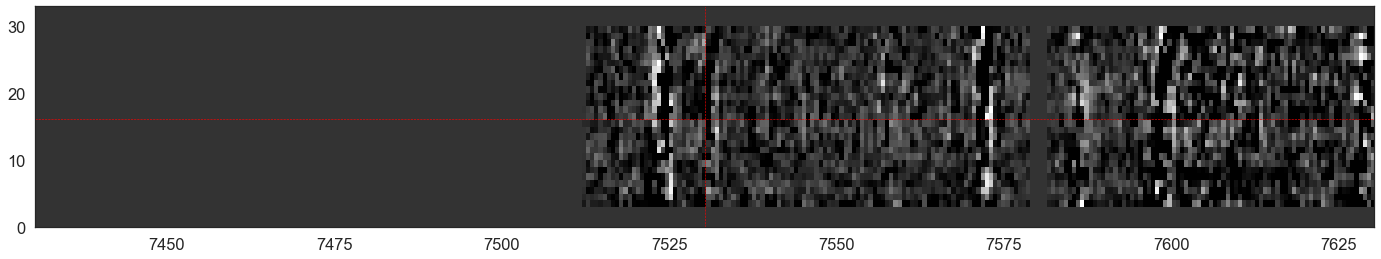

z5_GND_14554 5.301208266015337  Lya :  7657.858405688438


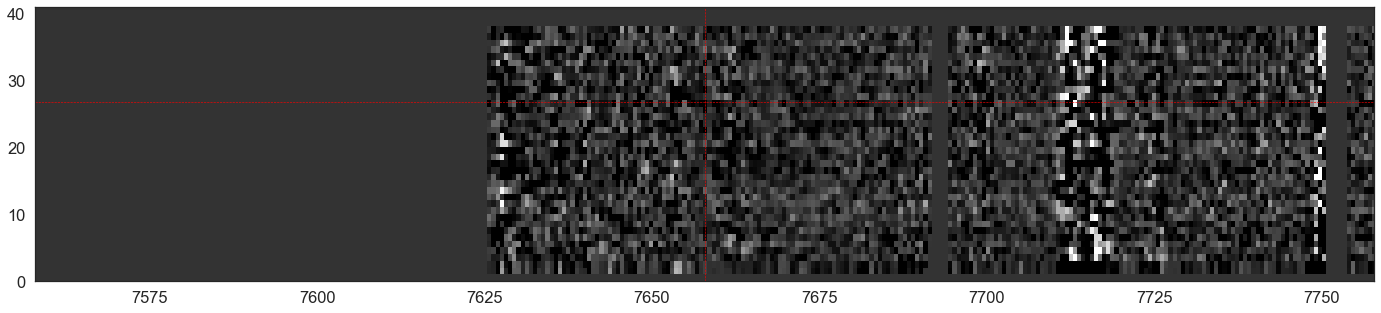

z5_GND_11088 5.189396665211389  Lya :  7521.973767231401


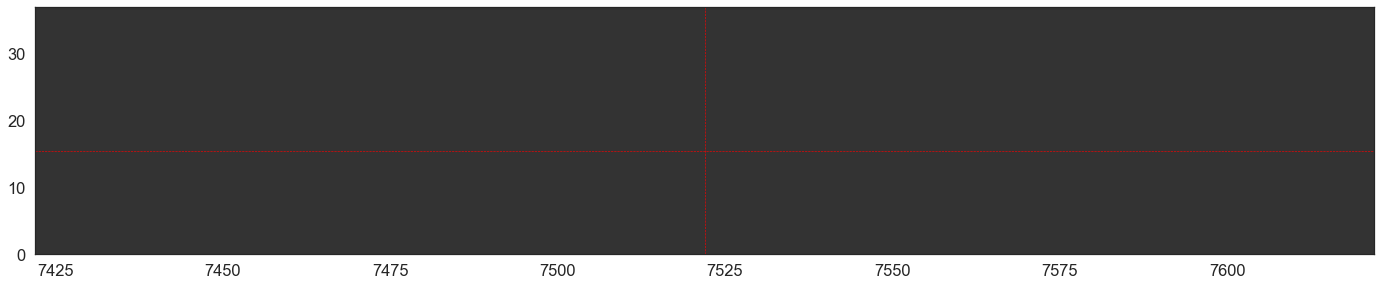

z5_GND_40815 5.182541730557197  Lya :  7513.64296514616


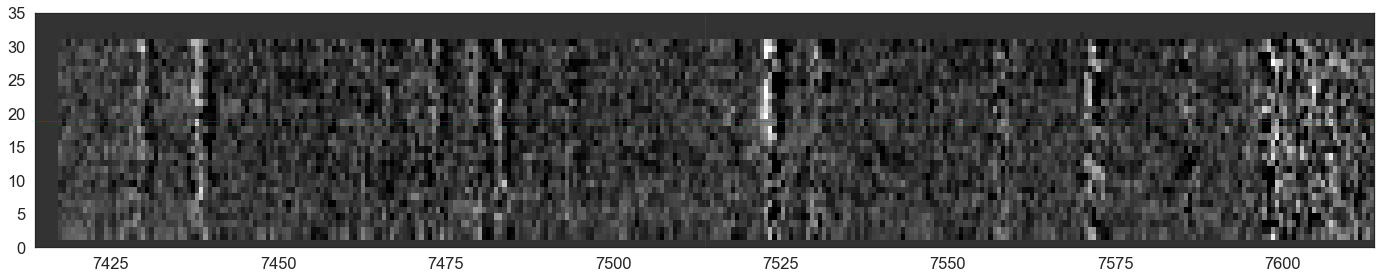

z5_GND_37378 5.2215386921454945  Lya :  7561.035972564419


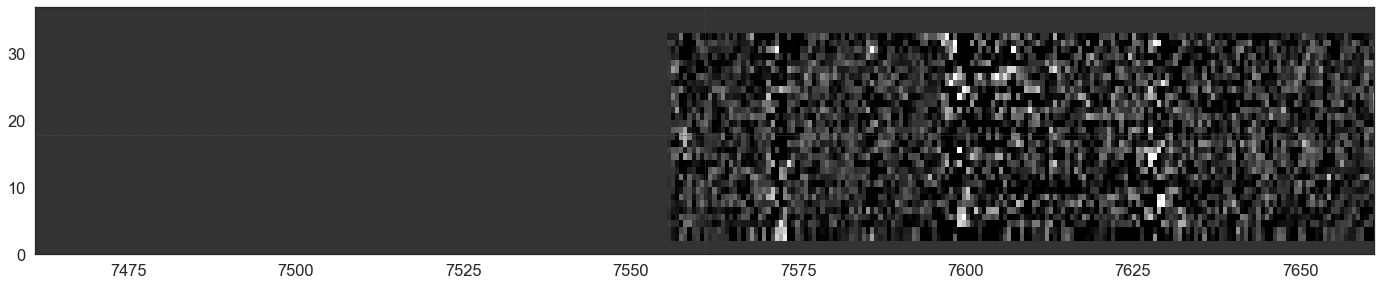

z5_GND_39635 5.187111686993325  Lya :  7519.196833202987


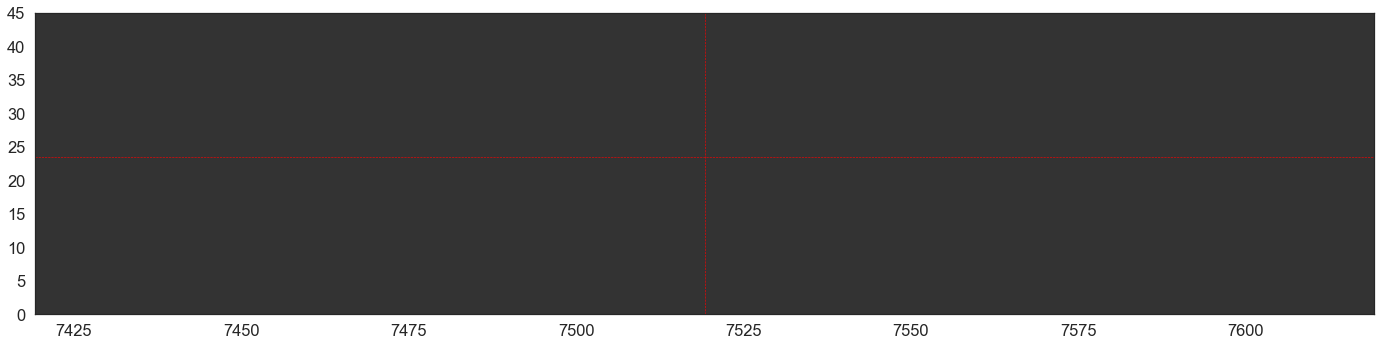

z5_GND_40117 5.180256752339132  Lya :  7510.866031117747


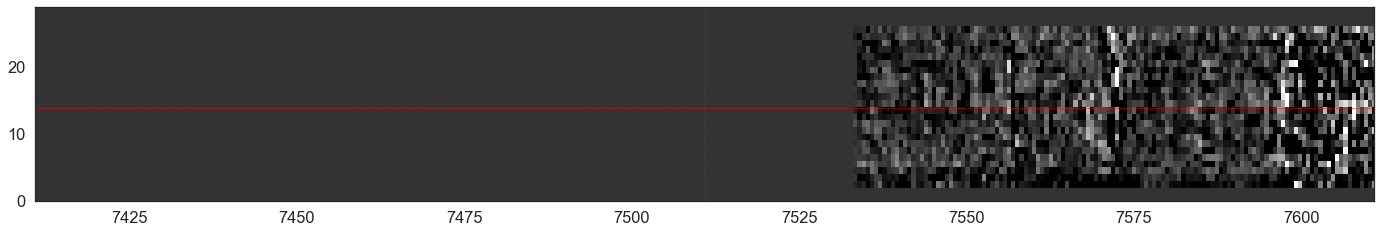

z5_GND_35084 5.047575683810199  Lya :  7349.618728534534


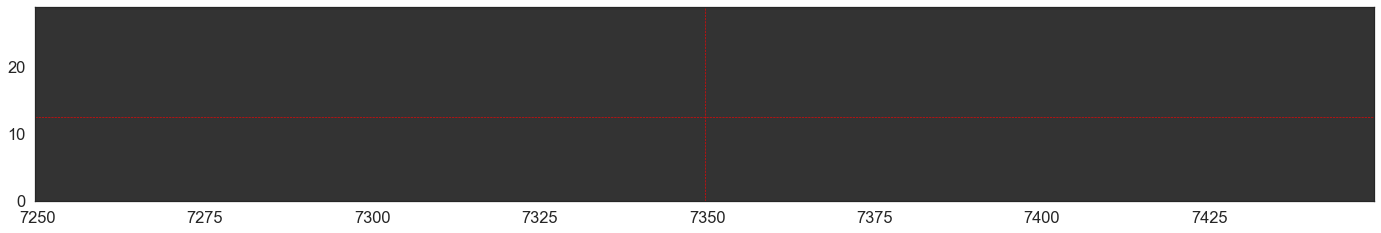

z5_GND_34379 5.226870307987644  Lya :  7567.515485297384


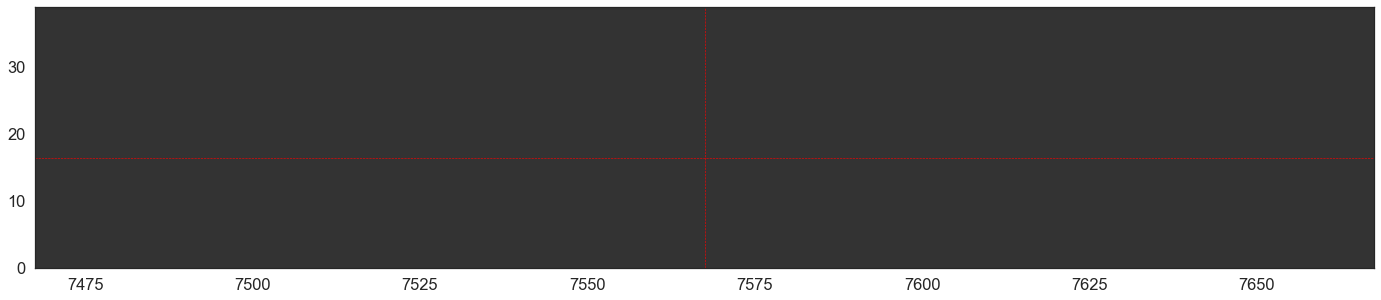

z5_GND_33500 5.230678605017752  Lya :  7572.143708678073


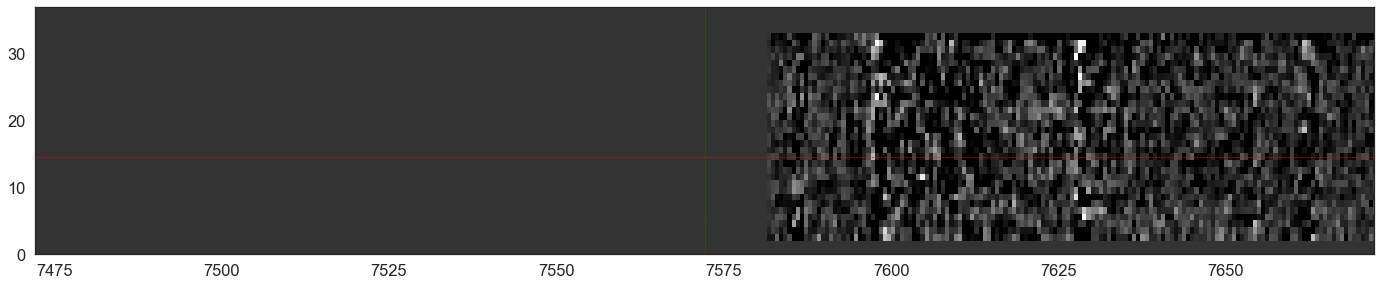

z5_GND_34594 5.189396665211389  Lya :  7521.973767231401


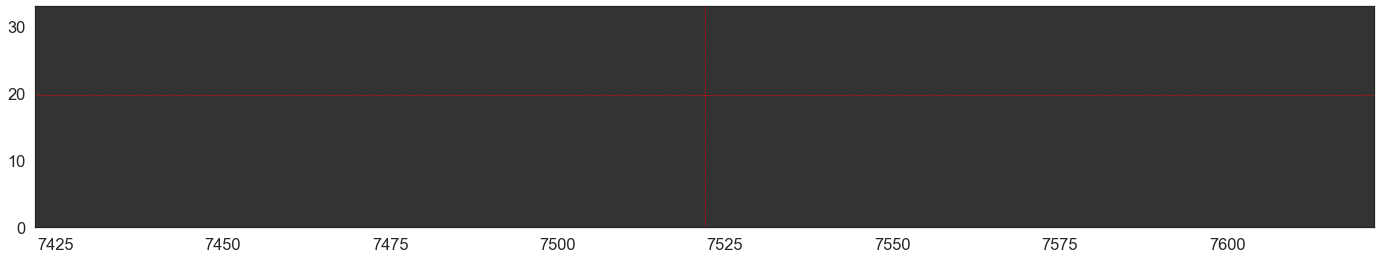

z5_GND_26806 5.1922909709542715  Lya :  7525.491217000726


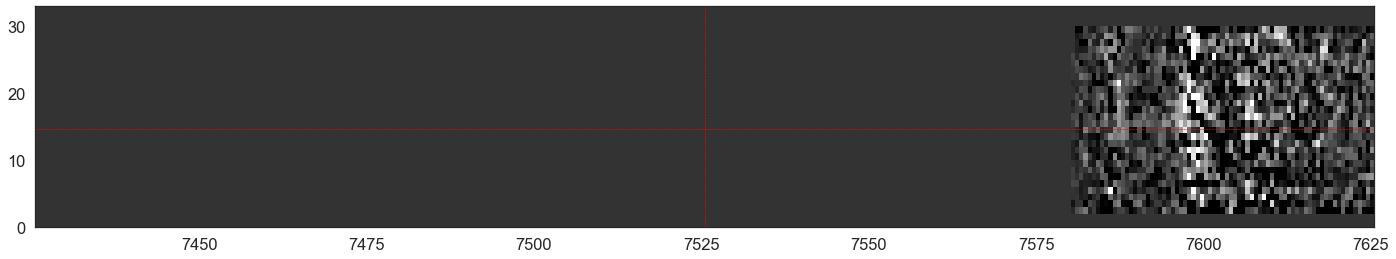

z5_GND_27870 5.216968735709366  Lya :  7555.482104507592


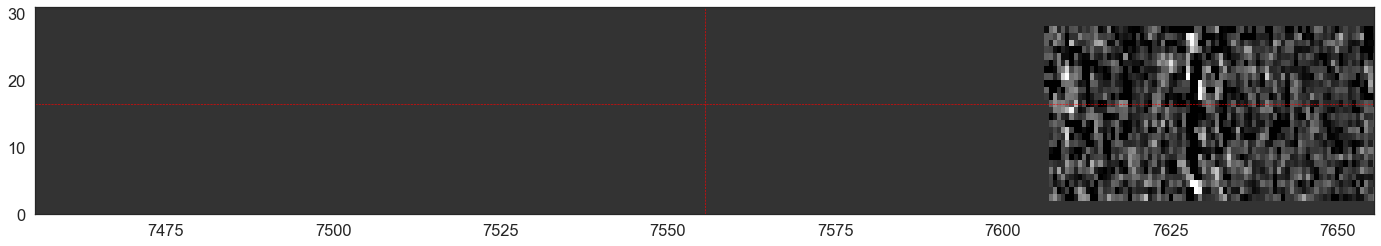

z5_GND_18697 5.184826708775261  Lya :  7516.419899174574


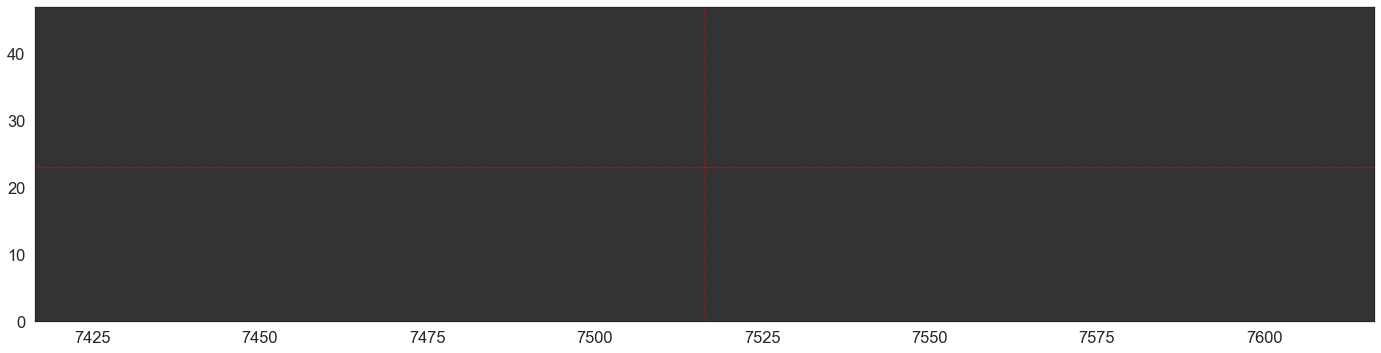

z5_GND_16018 5.012996346776825  Lya :  7307.594460237876


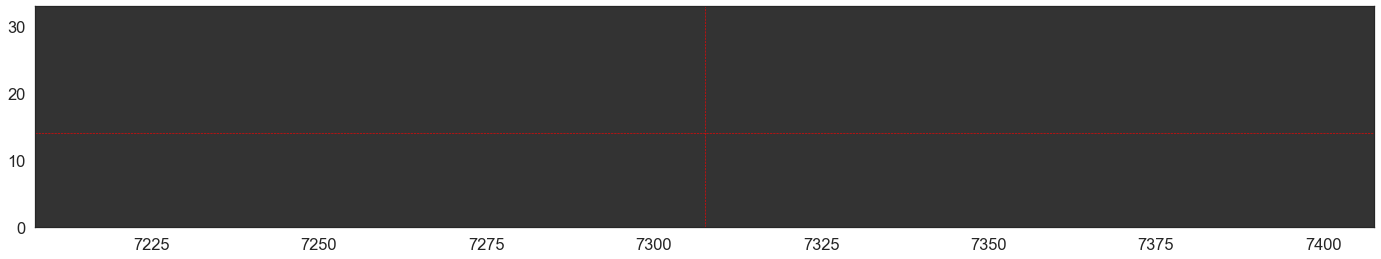

z5_GND_12659 5.196251599865583  Lya :  7530.304569316643


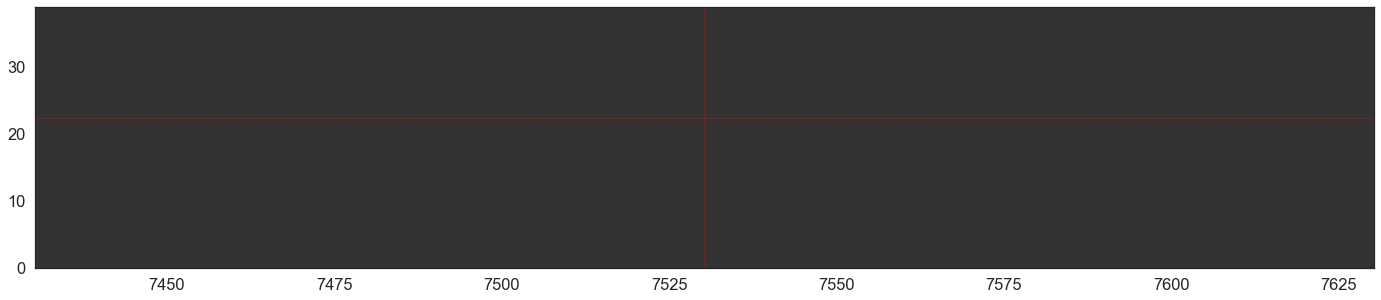

z5_GND_11789 5.193966621647519  Lya :  7527.527635288229


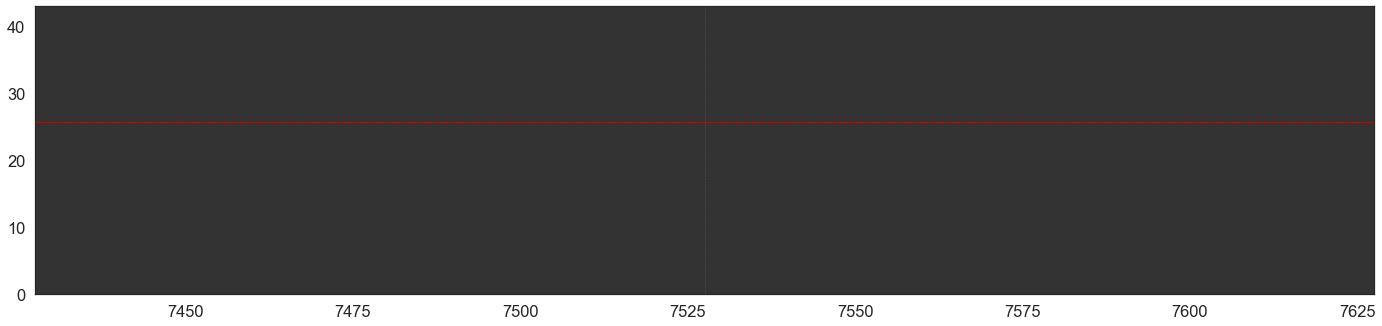

z5_GND_12705 5.193966621647519  Lya :  7527.527635288229


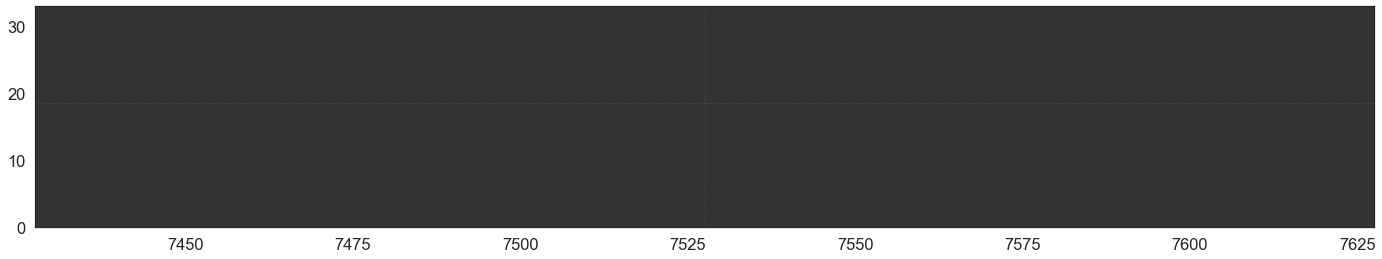

z5_GND_12062 5.017566303212954  Lya :  7313.148328294703


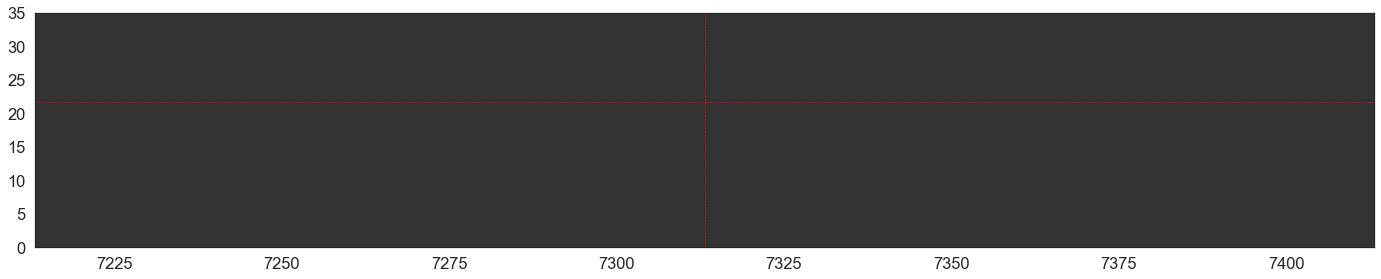

z5_GND_44836 5.184522045012852  Lya :  7516.049641304119


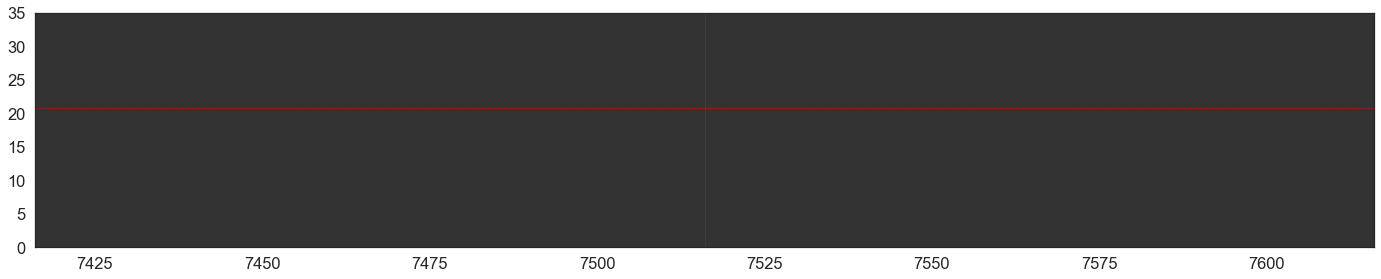

z5_GND_8641 5.193966621647519  Lya :  7527.527635288229


z5_GND_44411 5.274854850566995  Lya :  7625.831099894069


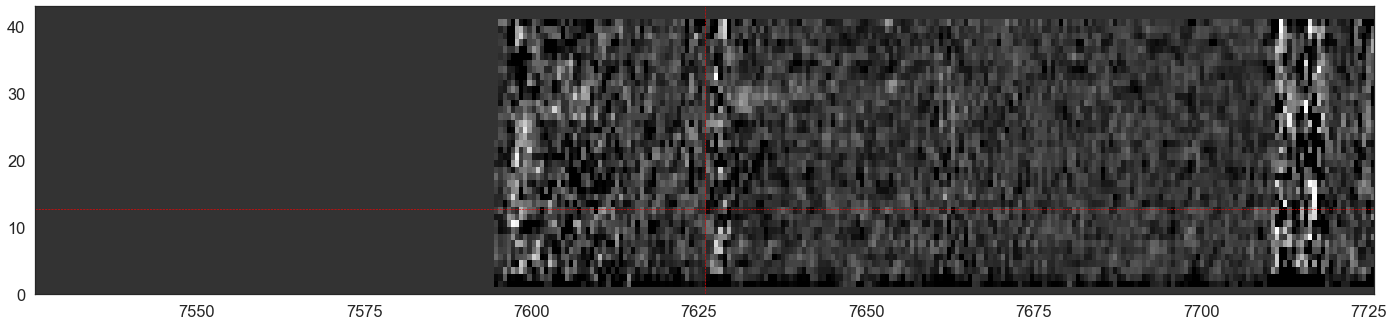

z5_GND_6005 6.190064792842352  Lya :  8738.085742741312


z5_GND_42189 5.196251599865583  Lya :  7530.304569316643


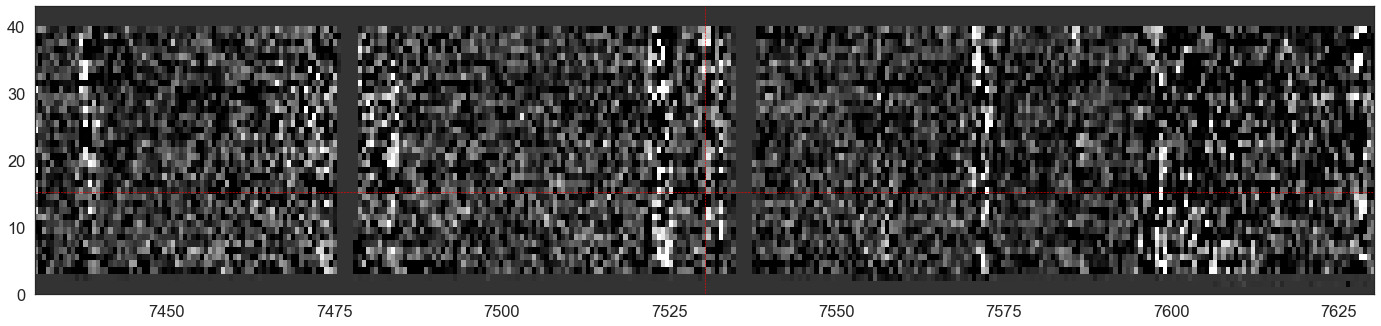

z5_GND_32925 5.184217381250444  Lya :  7515.679383433664


z5_GND_29527 5.033256486976995  Lya :  7332.216608623142


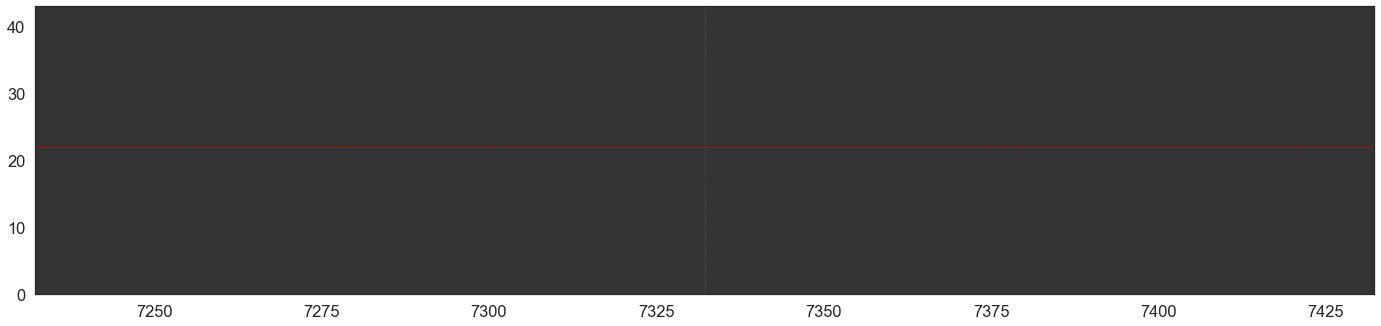

z5_GND_27366 5.179190429170703  Lya :  7509.570128571155


z5_GND_26558 5.184217381250444  Lya :  7515.679383433664


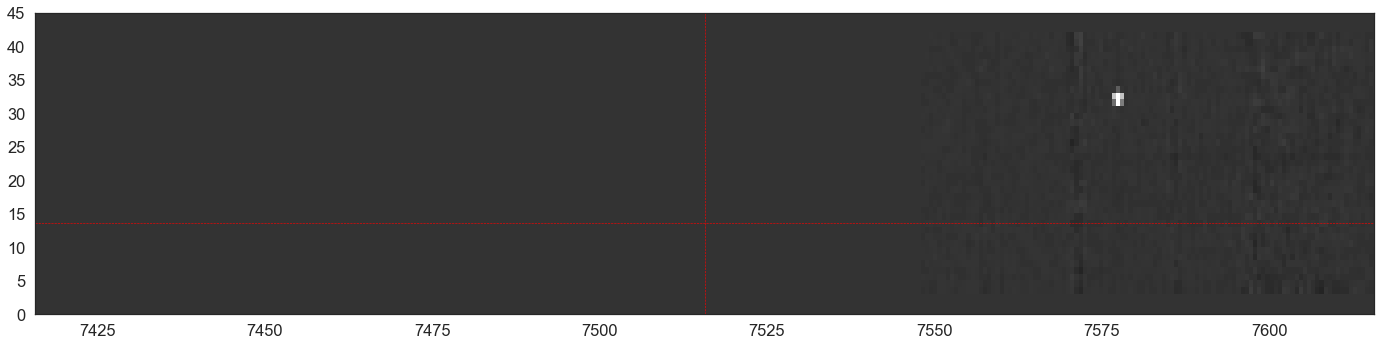

z5_GND_25578 5.294810327004757  Lya :  7650.0829904088805


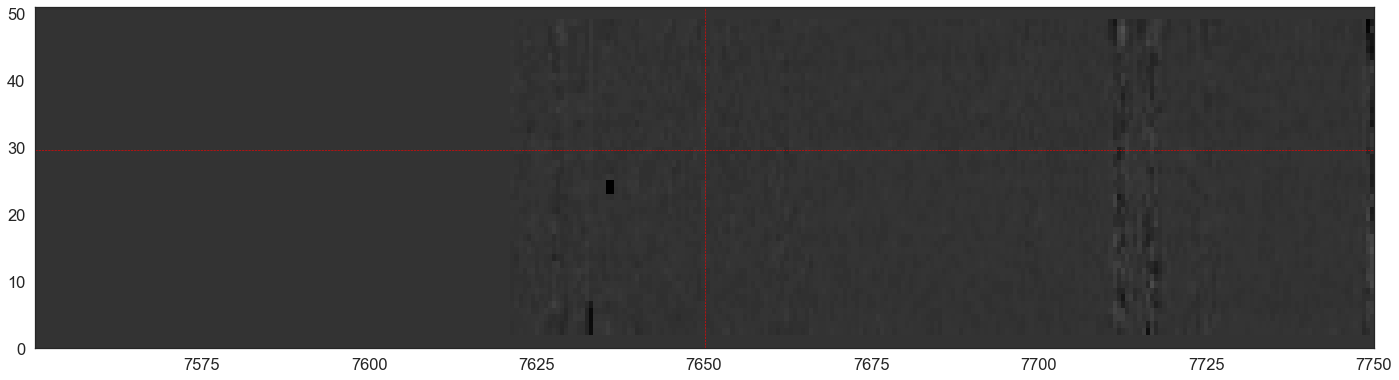

z5_GND_23450 5.244083810563729  Lya :  7588.435054978099


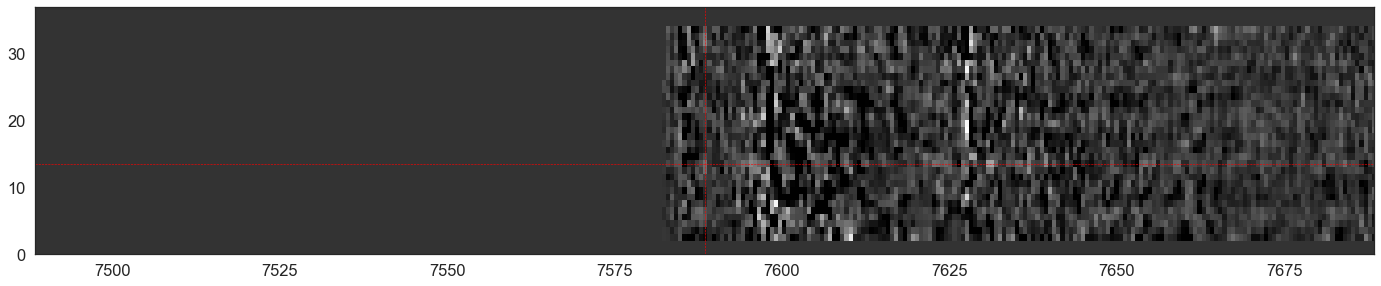

z5_GND_21873 5.270437226012071  Lya :  7620.462360772469


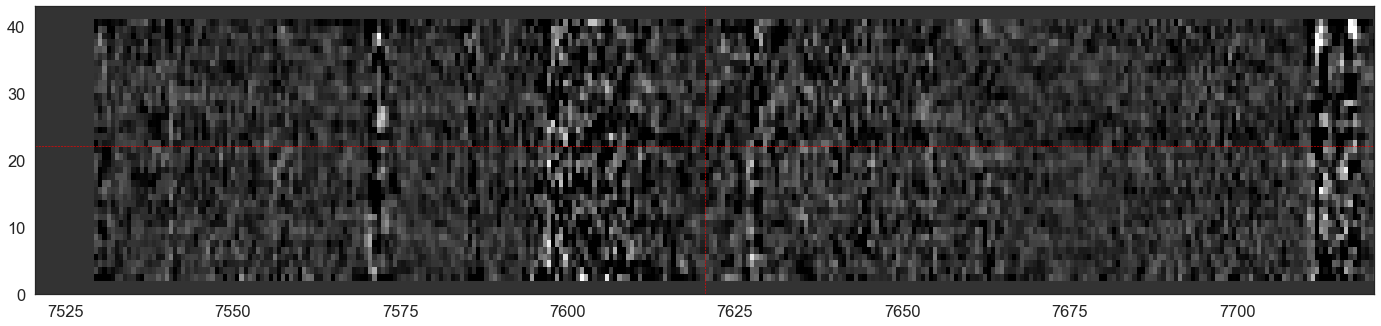

z5_GND_21641 5.184217381250444  Lya :  7515.679383433664


z5_GND_13494 5.38483846879649  Lya :  7759.494191128374


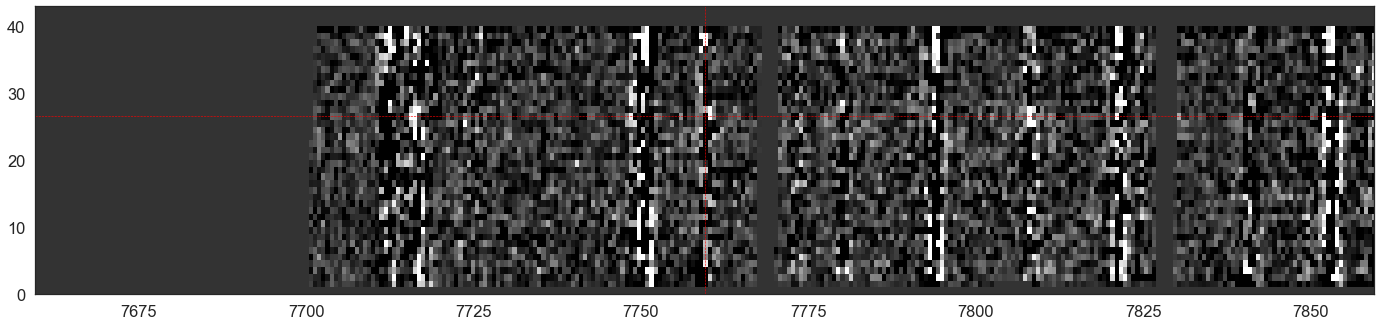

z5_GND_16723 5.367472634339202  Lya :  7738.389492512431


z5_GND_45273 5.1511613630291135  Lya :  7475.5064044892815


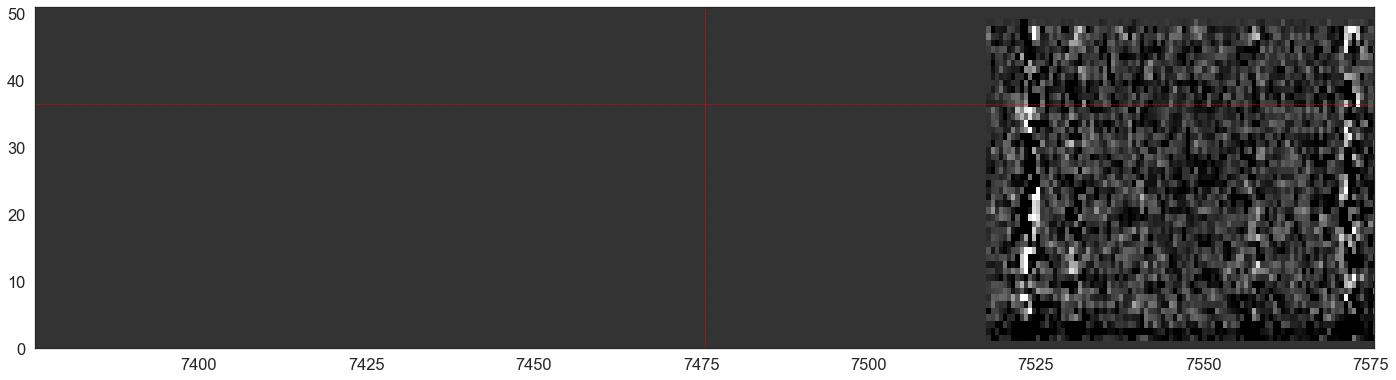

z5_GND_15486 5.191681643429454  Lya :  7524.750701259814


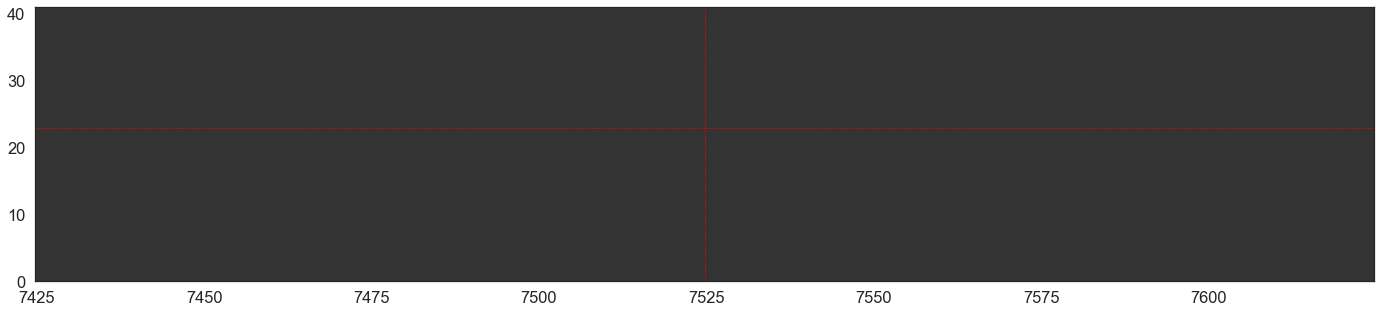

z5_GND_7334 5.543263625248949  Lya :  7952.0282837650475


z5_GND_28891 5.184217381250444  Lya :  7515.679383433664


z5_GND_22796 5.4459235531594095  Lya :  7833.73089415463


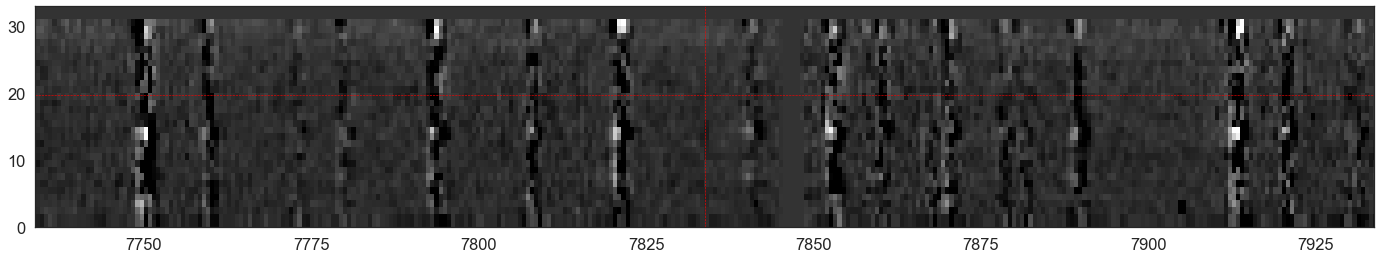

z7_GND_18323 6.41703929583674  Lya :  9013.927856230392


z7_GND_10402 6.529917219809117  Lya :  9151.10839723402


z8_GND_23069 7.126808644715238  Lya :  7534.932792697331


In [89]:
import glob
sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams["figure.figsize"] = (24,16)

fs=glob.glob("../data/large_files/Reduced_Data/Mask1/2D/noiseCorrected/*.fits")+glob.glob("../data/large_files/Reduced_Data/Mask2_1/2D/noiseCorrected/*.fits")+glob.glob("../data/large_files/Reduced_Data/Mask2_2/2D/noiseCorrected/*.fits")+glob.glob("../data/large_files/Reduced_Data/Mask2_3/2D/noiseCorrected/*.fits")
wave2D=np.arange(6760.0,6760.0+5631*0.620000004768,0.620000004768)

for gal in lines[:]:
    if gal["Ha"]!="X":
        id=gal["ID"]
        zlya=(1215.3)*(1+(float(gal["Ha"])/6564.614)-1)
        print(gal["ID"], (float(gal["Ha"])/6564.614)-1, " Lya : ", (1215.3)*(1+(float(gal["Ha"])/6564.614)-1))
    elif gal["Oiii"]!="X":
        id=gal["ID"]
        zlya=(1215.3)*(1+(float(gal["Oiii"])/6564.614)-1)
        print(gal["ID"], (float(gal["Oiii"])/5008.239)-1, " Lya : ", (1215.3)*(1+(float(gal["Oiii"])/6564.614)-1))

    else:
        continue

    for f in fs:
        if id in f:
            data=fits.open(f)


    
    plt.imshow(data[0].data,extent=[min(wave2D),max(wave2D),0,np.shape(data[0].data)[0]],aspect=1,cmap='gray',vmin=-0.5*np.std(data[0].data),vmax=2*np.std(data[0].data))
    plt.axvline(x=zlya,color="red",lw=0.6,ls="--")
    plt.axhline(y=data[0].header["SLITYPIX"],color="red",lw=0.6,ls="--")
    plt.xlim(zlya-100,zlya+100)
    plt.show()


<ipython-input-90-3ef6a0b4d346>:5: RuntimeWarning: invalid value encountered in true_divide
  wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


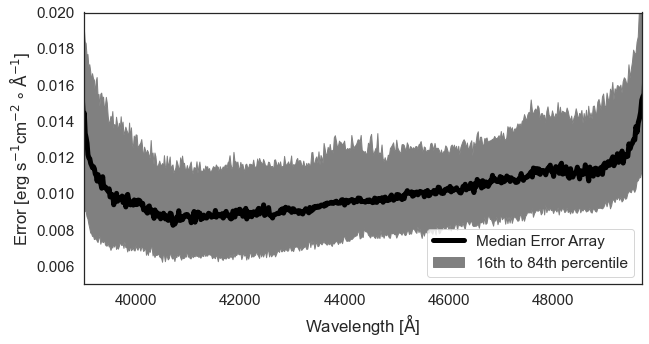

In [90]:
All_e=[]
for gal in PObj[:]:
    #print(gal.ID)
    f=fits.open("../data/large_files/Fresco/fresco-only-n-v2_"+f"{gal.IDFresco:05}"+".1D.fits")
    wave,flux,err=f[1].data["wave"],f[1].data["flux"]/f[1].data["flat"]*1e18,f[1].data["err"]/f[1].data["flat"]*1e18
    All_e.append(err)

sns.set_theme(style="white",font_scale = 1.4)
plt.rcParams["figure.figsize"] = (10,5)

plt.ylim(0.005,0.02)
plt.xlim(39000,49700)

med=np.nanmedian(All_e,axis=0)
p16,p84=np.nanpercentile(All_e,axis=0,q=[16,84])

plt.fill_between(wave, p16, p84,color="gray",alpha=1,label="16th to 84th percentile")
plt.plot(wave,med,color="black",lw="5",ls="-",label="Median Error Array")
plt.legend(loc=4)
plt.ylabel(r"Error [erg s$^{-1}$cm$^{-2}\circ{\mathrm{\AA}}^{-1} $]")
plt.xlabel(r"Wavelength [$\mathrm{\AA}$]")
plt.show()

## Lets smooth it with a rolling median

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


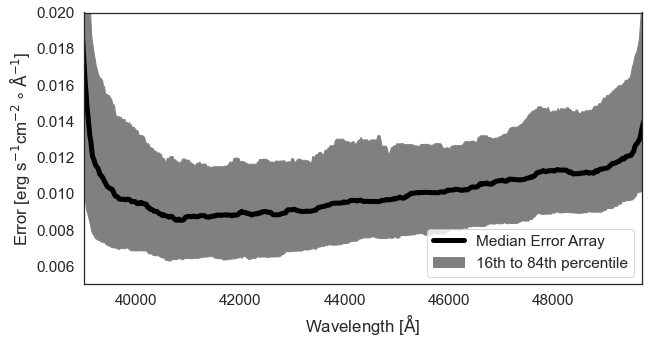

In [91]:
import pandas as pd
import scipy

window=10


med=np.nanmedian(All_e,axis=0)
p16,p84=np.nanpercentile(All_e,axis=0,q=[16,84])


Rolled=pd.Series(med).rolling(window,min_periods=0,axis=0).median().values

Rolled_16=pd.Series(p16).rolling(window,min_periods=0).quantile(0.16).values
Rolled_84=pd.Series(p84).rolling(window,min_periods=0).quantile(0.84).values


sns.set_theme(style="white",font_scale = 1.4)
plt.rcParams["figure.figsize"] = (10,5)

plt.ylim(0.005,0.02)
plt.xlim(39000,49700)

#med=np.nanmedian(All_e,axis=0)
#p16,p84=np.nanpercentile(All_e,axis=0,q=[16,84])

plt.fill_between(wave, Rolled_16, Rolled_84,color="gray",alpha=1,label="16th to 84th percentile")


plt.plot(wave,Rolled,color="black",lw="5",ls="-",label="Median Error Array")
plt.legend(loc=4)
plt.ylabel(r"Error [erg s$^{-1}$cm$^{-2}\circ{\mathrm{\AA}}^{-1} $]")
plt.xlabel(r"Wavelength [$\mathrm{\AA}$]")
plt.show()

ErrFunc=scipy.interpolate.interp1d(wave,Rolled)

def Ratio(wavelength,func):
    return func(wavelength)/func(44000)


## Lets load the 8 sources that do not have a match, but are in the FoV

There are 2 sources that had the same classification, but their Ha would be outside Fresco Anyways

Of these sources there is one LAE and 7 nonDetections

These results are error flux densities, and it was done at around 42000-46000 A. So let's say its 440000
The wavelength dependance I will add as a percentage increase over it depending on the Wavelength curve above.


I need to assume a wavelength position from zphot or zspec, and get a FWHMHa width to extract error.

In [92]:
Errors=np.load("../Catalogs/OnlyFoV_HaFluxErr.npy",allow_pickle=True)
C=ascii.read("../Catalogs/Binospec-Candels.cat")

ErrorsHere=[]
for dat in Errors:
    id=list(C["id_charlotte"]).index(dat[0])
    gal=C[id]
    FluxDensity=dat[1]
    z=gal["photoz"]
    if np.isnan(gal["z"])==False:
        z=gal["z"]

    Ha=6564.614*(1+z)

    FWHM=np.random.normal(loc=375, scale=115, size=1000)
    m=(wave>Ha-100) & (wave<Ha+100)
    bin_size=wave[m][6]-wave[m][5]
    
    listOfErrors=[]

    for fwhm in FWHM:
        edge=(Tools.kmsToangstrom(fwhm,Ha))
        err=float(dat[1])*(edge/bin_size) #1sigma
        err=err*5*bin_size
        listOfErrors.append(err)

    ErrorsHere.append({"ID":C["id_charlotte"][id],"HaFlux":[np.median(listOfErrors)*Ratio(Ha,ErrFunc),np.nan],"EWHa":[np.nan,np.nan] })    


np.save("../Catalogs/ForMaster/inFoV_Limits.npy",ErrorsHere)

In [1]:
np.e**5.651

NameError: name 'np' is not defined

In [93]:
plt.hist(Measurements,range=[-19.5,-16.5],bins=10)
plt.hist(np.log10(ErrorsHere),range=[-19.5,-16.5])
plt.hist(np.log10(Limits),range=[-19.5,-16.5],color="gray")


TypeError: loop of ufunc does not support argument 0 of type dict which has no callable log10 method

In [ ]:
AllnoLyaHa

[{'ID': 'z6_GND_16819',
  'HaFlux': [2.034389714043279e-17, 9.709728676410036e-19],
  'HaFWHM': [462.7789733062964, 24.30870664905524],
  'Off': [nan, nan],
  'zsys': array([5.30696644, 5.30715433, 5.30733607]),
  'EWHa': [221.87433804565364, 16.419160055872734],
  'line': 'Ha'},
 {'ID': 'z5_GND_14430',
  'HaFlux': [4.560589514387368e-18, 6.074662158298158e-19],
  'HaFWHM': [253.55715324322227, 39.88557654840406],
  'Off': [nan, nan],
  'zsys': array([5.24102357, 5.24130557, 5.24158688]),
  'EWHa': [117.06477145803633, 16.800277014694203],
  'line': 'Ha'},
 {'ID': 'z5_GND_30190',
  'HaFlux': [2.4485377034425986e-18, 4.510163749799424e-19],
  'HaFWHM': [310.72433766920585, 66.52870846883161],
  'Off': [nan, nan],
  'zsys': array([5.17162482, 5.17210673, 5.1727254 ]),
  'EWHa': [381.58433193291995, 74.46351567046993],
  'line': 'Ha'},
 {'ID': 'z5_GND_42418',
  'HaFlux': [1.0631483504600864e-17, 5.509915945033362e-19],
  'HaFWHM': [478.9455378758721, 24.48828766302904],
  'Off': [nan, nan

In [ ]:
ErrorsHere

[{'ID': 'z6_GND_34516',
  'HaFlux': [2.747511934067944e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z6_GND_44248',
  'HaFlux': [2.784789036498663e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z6_GND_43953',
  'HaFlux': [3.110326463027896e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z5_GND_35096',
  'HaFlux': [2.556968218560057e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'z5_GND_42576',
  'HaFlux': [2.1465279198300437e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'Hu10_z6_12',
  'HaFlux': [2.706468626945502e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'Hu10_z6_9',
  'HaFlux': [3.0287026393050804e-18, nan],
  'EWHa': [nan, nan]},
 {'ID': 'Stark11_42_13066',
  'HaFlux': [3.174433977721701e-18, nan],
  'EWHa': [nan, nan]}]